In [2]:

import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
%matplotlib inline
from pandas import Series
from pandas import DataFrame
from pandas.tools.plotting import scatter_matrix
from pylab import rcParams
import scipy as sp
import seaborn as sns

from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import sklearn
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from collections import Counter
from sklearn import datasets

from IPython.display import Image
from IPython.core.display import HTML




C:\Users\mailm_000\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\mailm_000\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Load in data

In [4]:
data=pd.read_csv('data.csv', low_memory=False)

## Look at structure of data

In [74]:
data.head(8)

,Req Delv Dt,Cust Hier1,Shipt Orig Appt Date,Shipt Orig Appt Time,Shipt Origin Appt Date Orig,Shipt Origin Appt Time Orig,Shipment Origin Appt Reason,Shipt Dest Appt Date,Shipt Dest Appt Time,Shipt Dest Appt Date Orig,...,Declined,% Declined,Rejected,% Rejected,Expired,% Expired,1st Tender Accepted,% 1st Tender Accepted,Average Carrier Response (Min),Carrier Type
0,3/24/2017,C001,3/23/2017,10:00 AM,3/23/2017,10:00 AM,NA-Normal Appointment,3/24/2017,10:00 AM,3/24/2017,...,0,0.0,0,0.0,0,0.0,Yes,1,3.950000,Primary
1,3/22/2017,T002,NaN,NaN,NaN,NaN,NaN,3/22/2017,2:00 PM,3/22/2017,...,0,0.0,0,0.0,0,0.0,Yes,1,20.816667,Primary
2,3/26/2017,T002,3/24/2017,11:00 AM,3/24/2017,11:00 AM,NA-Normal Appointment,3/26/2017,11:30 PM,3/26/2017,...,0,0.0,0,0.0,0,0.0,Yes,1,38.766667,Primary
3,3/22/2017,C001,3/20/2017,11:00 AM,3/20/2017,11:00 AM,NA-Normal Appointment,3/22/2017,5:00 AM,3/22/2017,...,1,1.0,0,0.0,0,0.0,No,0,9.216667,Secondary
4,3/22/2017,C001,3/20/2017,11:00 AM,3/20/2017,11:00 AM,NA-Normal Appointment,3/22/2017,5:00 AM,3/22/2017,...,0,0.0,0,0.0,0,0.0,No,0,9.216667,Secondary
5,3/22/2017,C001,3/20/2017,11:00 AM,3/20/2017,11:00 AM,NA-Normal Appointment,3/22/2017,5:00 AM,3/22/2017,...,0,0.0,0,0.0,0,0.0,Yes,1,9.216667,Secondary
6,3/22/2017,D003,3/21/2017,3:05 PM,3/21/2017,3:05 PM,NA-Normal Appointment,3/22/2017,7:00 AM,3/22/2017,...,0,0.0,0,0.0,0,0.0,Yes,1,17.600000,Primary
7,3/21/2017,C001,3/20/2017,3:05 PM,3/20/2017,3:05 PM,NA-Normal Appointment,3/21/2017,6:00 AM,3/21/2017,...,0,0.0,0,0.0,0,0.0,Yes,1,0.000000,Primary


In [10]:
data.tail()

,Req Delv Dt,Cust Hier1,Shipt Orig Appt Date,Shipt Orig Appt Time,Shipt Origin Appt Date Orig,Shipt Origin Appt Time Orig,Shipment Origin Appt Reason,Shipt Dest Appt Date,Shipt Dest Appt Time,Shipt Dest Appt Date Orig,...,Declined,% Declined,Rejected,% Rejected,Expired,% Expired,1st Tender Accepted,% 1st Tender Accepted,Average Carrier Response (Min),Carrier Type
72902,2/23/2017 0:00,D003,2/22/2017,7:00 AM,2/22/2017,7:00 AM,NA-Normal Appointment,2/23/2017,5:00 AM,2/23/2017,...,1,1.0,0,0.0,0,0.000000,No,0,907.641667,Secondary
72903,2/23/2017 0:00,D003,2/22/2017,7:00 AM,2/22/2017,7:00 AM,NA-Normal Appointment,2/23/2017,5:00 AM,2/23/2017,...,0,0.0,0,0.0,0,0.000000,No,0,907.641667,Secondary
72904,2/23/2017 0:00,D003,2/22/2017,7:00 AM,2/22/2017,7:00 AM,NA-Normal Appointment,2/23/2017,5:00 AM,2/23/2017,...,0,0.0,0,0.0,0,0.000000,No,0,907.641667,Secondary
72905,2/23/2017 0:00,D003,2/22/2017,7:00 AM,2/22/2017,7:00 AM,NA-Normal Appointment,2/23/2017,5:00 AM,2/23/2017,...,0,0.0,0,0.0,1,1.000000,No,0,907.641667,Secondary
72906,2/23/2017 0:00,D003,2/22/2017,7:00 AM,2/22/2017,7:00 AM,NA-Normal Appointment,2/23/2017,5:00 AM,2/23/2017,...,0,0.0,0,0.0,1,0.333333,No,0,907.641667,Primary


In [7]:
data.columns

Index(['Req Delv Dt', 'Cust Hier1', 'Shipt Orig Appt Date',
       'Shipt Orig Appt Time', 'Shipt Origin Appt Date Orig ',
       'Shipt Origin Appt Time Orig', 'Shipment Origin Appt Reason',
       'Shipt Dest Appt Date', 'Shipt Dest Appt Time',
       'Shipt Dest Appt Date Orig', 'Shipt Dest Appt Time Orig',
       'Shipment Destination Appt Reason', 'Shipt Planned Departure Date',
       'Shipt Planned Departure Time', 'Shipt Planned Arrival Date',
       'Shipt Planned Arrival Time', 'Shipt Arrive at Origin Date',
       'Shipt Arrive at Origin Time', 'Shipment Arrive Origin Reason',
       'Shipt Depart Origin Date', 'Shipt Depart Origin Time',
       'Shipt Arrive at Dest Date', 'Shipt Arrive at Dest Time',
       'Shipment Arrive Destination Reason', 'Shipment Weight (lb)',
       'Shipment Volume (cubic ft)', 'Shipment Loaded Miles', 'Order #',
       'Stop Number', 'TRANSPORT_MODE', 'ORG_ZIP_FN', 'DEST_ZP_FN',
       'ORGIN_APPOINT_REA_CODE_FN', 'DEST_APPOINT_REA_CODE_FN',
   

In [11]:
data.dtypes

Req Delv Dt                            object
Cust Hier1                             object
Shipt Orig Appt Date                   object
Shipt Orig Appt Time                   object
Shipt Origin Appt Date Orig            object
Shipt Origin Appt Time Orig            object
Shipment Origin Appt Reason            object
Shipt Dest Appt Date                   object
Shipt Dest Appt Time                   object
Shipt Dest Appt Date Orig              object
Shipt Dest Appt Time Orig              object
Shipment Destination Appt Reason       object
Shipt Planned Departure Date           object
Shipt Planned Departure Time           object
Shipt Planned Arrival Date             object
Shipt Planned Arrival Time             object
Shipt Arrive at Origin Date            object
Shipt Arrive at Origin Time            object
Shipment Arrive Origin Reason          object
Shipt Depart Origin Date               object
Shipt Depart Origin Time               object
Shipt Arrive at Dest Date         

In [12]:
data.shape

(72907, 67)

In [13]:
data.columns = data.columns.str.replace(' ', '_')


In [14]:
data.columns

Index(['Req_Delv_Dt', 'Cust_Hier1', 'Shipt_Orig_Appt_Date',
       'Shipt_Orig_Appt_Time', 'Shipt_Origin_Appt_Date_Orig_',
       'Shipt_Origin_Appt_Time_Orig', 'Shipment_Origin_Appt_Reason',
       'Shipt_Dest_Appt_Date', 'Shipt_Dest_Appt_Time',
       'Shipt_Dest_Appt_Date_Orig', 'Shipt_Dest_Appt_Time_Orig',
       'Shipment_Destination_Appt_Reason', 'Shipt_Planned_Departure_Date',
       'Shipt_Planned_Departure_Time', 'Shipt_Planned_Arrival_Date',
       'Shipt_Planned_Arrival_Time', 'Shipt_Arrive_at_Origin_Date',
       'Shipt_Arrive_at_Origin_Time', 'Shipment_Arrive_Origin_Reason',
       'Shipt_Depart_Origin_Date', 'Shipt_Depart_Origin_Time',
       'Shipt_Arrive_at_Dest_Date', 'Shipt_Arrive_at_Dest_Time',
       'Shipment_Arrive_Destination_Reason', 'Shipment_Weight_(lb)',
       'Shipment_Volume_(cubic_ft)', 'Shipment_Loaded_Miles', 'Order_#',
       'Stop_Number', 'TRANSPORT_MODE', 'ORG_ZIP_FN', 'DEST_ZP_FN',
       'ORGIN_APPOINT_REA_CODE_FN', 'DEST_APPOINT_REA_CODE_FN',
   

In [6]:
#look at missing data
data.isnull().sum()

Req Delv Dt                              14
Cust Hier1                                0
Shipt Orig Appt Date                  14708
Shipt Orig Appt Time                  14708
Shipt Origin Appt Date Orig           14708
Shipt Origin Appt Time Orig           14708
Shipment Origin Appt Reason           14758
Shipt Dest Appt Date                    107
Shipt Dest Appt Time                    107
Shipt Dest Appt Date Orig               343
Shipt Dest Appt Time Orig               343
Shipment Destination Appt Reason        925
Shipt Planned Departure Date              0
Shipt Planned Departure Time              0
Shipt Planned Arrival Date                0
Shipt Planned Arrival Time                0
Shipt Arrive at Origin Date             174
Shipt Arrive at Origin Time             174
Shipment Arrive Origin Reason           315
Shipt Depart Origin Date                  3
Shipt Depart Origin Time                  3
Shipt Arrive at Dest Date                38
Shipt Arrive at Dest Time       

In [8]:
#look at percentage of missing data
data.isnull().sum()* 100 / len(data)

## will need to determine what to do with missing data. Perhaps use the average value after
##converting date and time to day of the week and part of the day

Req Delv Dt                            0.019203
Cust Hier1                             0.000000
Shipt Orig Appt Date                  20.173646
Shipt Orig Appt Time                  20.173646
Shipt Origin Appt Date Orig           20.173646
Shipt Origin Appt Time Orig           20.173646
Shipment Origin Appt Reason           20.242226
Shipt Dest Appt Date                   0.146762
Shipt Dest Appt Time                   0.146762
Shipt Dest Appt Date Orig              0.470462
Shipt Dest Appt Time Orig              0.470462
Shipment Destination Appt Reason       1.268740
Shipt Planned Departure Date           0.000000
Shipt Planned Departure Time           0.000000
Shipt Planned Arrival Date             0.000000
Shipt Planned Arrival Time             0.000000
Shipt Arrive at Origin Date            0.238660
Shipt Arrive at Origin Time            0.238660
Shipment Arrive Origin Reason          0.432057
Shipt Depart Origin Date               0.004115
Shipt Depart Origin Time               0

In [40]:
#lets look at descriptive statistics of the numerical data
data.describe()

#Issue found is that there is a negative min value for the response time. How is that possible?

,Shipment_Weight_(lb),Shipment_Volume_(cubic_ft),Shipment_Loaded_Miles,Order_#,Stop_Number,ORG_ZIP_FN,DEST_ZP_FN,Origin_Zip,SID,Loads_/_Lane,...,Withdrawn,%_Withdrawn,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,%_1st_Tender_Accepted,Average_Carrier_Response_(Min)
count,72907.000000,72907.000000,72907.000000,7.290700e+04,72907.000000,72907.000000,72907.000000,72907.000000,7.290700e+04,72907.000000,...,72907.000000,72907.000000,72907.000000,72907.000000,72907.000000,72907.000000,72907.000000,72907.000000,72907.000000,72907.000000
mean,41847.979528,1906.513395,418.380156,2.063440e+07,2.055962,57889.059473,55449.645425,57889.059473,4.460002e+14,10.346729,...,0.071187,0.063307,0.178200,0.156624,0.002496,0.001644,0.077427,0.064400,0.708423,59.298377
std,6769.174989,707.895645,395.609302,1.227447e+07,0.280339,27024.328190,29898.277210,27024.328190,3.055858e+06,13.894742,...,0.264708,0.237834,0.437534,0.358902,0.057797,0.037467,0.298818,0.238909,0.454492,219.572210
min,2821.120000,180.520000,2.000000,4.647809e+06,2.000000,21001.000000,1089.000000,21001.000000,4.460002e+14,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.183333
25%,43286.600000,1336.960000,156.000000,4.871518e+06,2.000000,30213.000000,29353.000000,30213.000000,4.460002e+14,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.616667
50%,44205.000000,1971.940000,307.000000,3.005805e+07,2.000000,60484.000000,49053.000000,60484.000000,4.460002e+14,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.783333
75%,44730.982000,2501.810000,570.000000,3.020613e+07,2.000000,77020.000000,85224.000000,77020.000000,4.460002e+14,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,37.175000
max,46527.520000,3603.360000,2723.000000,3.034522e+07,5.000000,97477.000000,98424.000000,97477.000000,4.460002e+14,188.000000,...,3.000000,1.000000,7.000000,1.000000,5.000000,1.000000,6.000000,1.000000,1.000000,3819.333333


## Convert dates to proper date formats

In [15]:
data.Req_Delv_Dt.head()

0    3/24/2017
1    3/22/2017
2    3/26/2017
3    3/22/2017
4    3/22/2017
Name: Req_Delv_Dt, dtype: object

In [16]:
data['Req_Delv_Dt'] = pd.to_datetime(data.Req_Delv_Dt)

data['Shipt_Orig_Appt_Date'] = pd.to_datetime(data.Shipt_Orig_Appt_Date)


data['Shipt_Origin_Appt_Date_Orig_'] = pd.to_datetime(data.Shipt_Origin_Appt_Date_Orig_)

data['Shipt_Dest_Appt_Date'] = pd.to_datetime(data.Shipt_Dest_Appt_Date)


data['Shipt_Dest_Appt_Date_Orig'] = pd.to_datetime(data.Shipt_Dest_Appt_Date_Orig)

data['Shipt_Planned_Departure_Date'] = pd.to_datetime(data.Shipt_Planned_Departure_Date)

data['Shipt_Planned_Arrival_Date'] = pd.to_datetime(data.Shipt_Planned_Arrival_Date)

data['Shipt_Arrive_at_Origin_Date'] = pd.to_datetime(data.Shipt_Arrive_at_Origin_Date)

data['Shipt_Depart_Origin_Date'] = pd.to_datetime(data.Shipt_Depart_Origin_Date)

data['Shipt_Arrive_at_Dest_Date'] = pd.to_datetime(data.Shipt_Arrive_at_Dest_Date)






In [22]:
data.dtypes

Req_Delv_Dt                           datetime64[ns]
Cust_Hier1                                    object
Shipt_Orig_Appt_Date                  datetime64[ns]
Shipt_Orig_Appt_Time                          object
Shipt_Origin_Appt_Date_Orig_          datetime64[ns]
Shipt_Origin_Appt_Time_Orig                   object
Shipment_Origin_Appt_Reason                   object
Shipt_Dest_Appt_Date                  datetime64[ns]
Shipt_Dest_Appt_Time                          object
Shipt_Dest_Appt_Date_Orig             datetime64[ns]
Shipt_Dest_Appt_Time_Orig                     object
Shipment_Destination_Appt_Reason              object
Shipt_Planned_Departure_Date          datetime64[ns]
Shipt_Planned_Departure_Time                  object
Shipt_Planned_Arrival_Date            datetime64[ns]
Shipt_Planned_Arrival_Time                    object
Shipt_Arrive_at_Origin_Date           datetime64[ns]
Shipt_Arrive_at_Origin_Time                   object
Shipment_Arrive_Origin_Reason                 

In [41]:
data.head(8)

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
0,2017-03-24,C001,2017-03-23,10:00 AM,2017-03-23,10:00 AM,NA-Normal Appointment,2017-03-24,10:00 AM,2017-03-24,...,Friday,Thursday,Thursday,Friday,Friday,Thursday,Friday,Thursday,Thursday,Friday
1,2017-03-22,T002,NaT,NaN,NaT,NaN,NaN,2017-03-22,2:00 PM,2017-03-22,...,Wednesday,NaN,NaN,Wednesday,Wednesday,Tuesday,Wednesday,Wednesday,Wednesday,Wednesday
2,2017-03-26,T002,2017-03-24,11:00 AM,2017-03-24,11:00 AM,NA-Normal Appointment,2017-03-26,11:30 PM,2017-03-26,...,Sunday,Friday,Friday,Sunday,Sunday,Friday,Sunday,Friday,Friday,Friday
3,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday
4,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday
5,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday
6,2017-03-22,D003,2017-03-21,3:05 PM,2017-03-21,3:05 PM,NA-Normal Appointment,2017-03-22,7:00 AM,2017-03-22,...,Wednesday,Tuesday,Tuesday,Wednesday,Wednesday,Tuesday,Wednesday,Tuesday,Tuesday,Tuesday
7,2017-03-21,C001,2017-03-20,3:05 PM,2017-03-20,3:05 PM,NA-Normal Appointment,2017-03-21,6:00 AM,2017-03-21,...,Tuesday,Monday,Monday,Tuesday,Tuesday,Monday,Tuesday,Monday,Monday,Tuesday


In [36]:
#Lets inspect the max dates for any issues
max_per_col = data.max(axis=0)
max_per_col

#These are issues from the results- dates far into the future
#Shipt_Dest_Appt_Date                    2021-02-22 00:00:00
#Shipt_Dest_Appt_Date_Orig               2041-02-22 00:00:00


Req_Delv_Dt                             2017-03-31 00:00:00
Cust_Hier1                                             T002
Shipt_Orig_Appt_Date                    2017-11-24 00:00:00
Shipt_Origin_Appt_Date_Orig_            2017-03-30 00:00:00
Shipt_Dest_Appt_Date                    2021-02-22 00:00:00
Shipt_Dest_Appt_Date_Orig               2041-02-22 00:00:00
Shipt_Planned_Departure_Date            2017-12-29 00:00:00
Shipt_Planned_Departure_Time                        9:59 PM
Shipt_Planned_Arrival_Date              2017-12-29 00:00:00
Shipt_Planned_Arrival_Time                          9:45 AM
Shipt_Arrive_at_Origin_Date             2017-12-30 00:00:00
Shipt_Depart_Origin_Date                2017-03-31 00:00:00
Shipt_Arrive_at_Dest_Date               2017-03-31 00:00:00
Shipment_Weight_(lb)                                46527.5
Shipment_Volume_(cubic_ft)                          3603.36
Shipment_Loaded_Miles                                  2723
Order_#                                 

In [150]:
min_per_col = data.min(axis=0)
min_per_col

Req_Delv_Dt                       2015-12-14 00:00:00
Shipt_Orig_Appt_Date              2015-02-16 00:00:00
Shipt_Origin_Appt_Date_Orig_      2015-01-03 00:00:00
Shipt_Dest_Appt_Date              2015-01-06 00:00:00
Shipt_Dest_Appt_Date_Orig         2015-01-04 00:00:00
Shipt_Planned_Departure_Date      2015-12-17 00:00:00
Shipt_Planned_Arrival_Date        2015-12-19 00:00:00
Shipt_Arrive_at_Origin_Date       2015-12-17 00:00:00
Shipt_Depart_Origin_Date          2015-12-17 00:00:00
Shipt_Arrive_at_Dest_Date         2016-01-01 00:00:00
Shipment_Weight_(lb)                          2821.12
Shipment_Volume_(cubic_ft)                     180.52
Shipment_Loaded_Miles                               2
Order_#                                   4.64781e+06
Stop_Number                                         2
ORG_ZIP_FN                                      21001
DEST_ZP_FN                                       1089
Origin_Zip                                      21001
SID                         

In [38]:
#Lets look closer at the first wierd record with a very high future date
data.query("Shipt_Dest_Appt_Date=='2021-02-22'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
72879,2017-02-23,D003,2017-02-22,7:00 PM,2017-02-22,7:00 PM,NS-Normal Status,2021-02-22,10:00 PM,2021-02-22,...,Thursday,Wednesday,Wednesday,Monday,Monday,Wednesday,Thursday,Wednesday,Wednesday,Thursday
72880,2017-02-23,D003,2017-02-22,7:00 PM,2017-02-22,7:00 PM,NS-Normal Status,2021-02-22,10:00 PM,2021-02-22,...,Thursday,Wednesday,Wednesday,Monday,Monday,Wednesday,Thursday,Wednesday,Wednesday,Thursday


In [39]:
#Lets look closer at the first wierd record with a very high future date
data.query("Shipt_Dest_Appt_Date_Orig=='2041-02-22'")


,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
71566,2017-02-24,C001,2017-02-22,11:59 PM,2017-02-22,11:59 PM,NS-Normal Status,2017-02-24,6:00 AM,2041-02-22,...,Friday,Wednesday,Wednesday,Friday,Friday,Wednesday,Friday,Wednesday,Wednesday,Friday


In [60]:
#look at record with the largest average carrier response time
data[data['Average_Carrier_Response_(Min)']>3819]

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
44016,2016-09-02,C001,2016-09-01,12:00 PM,2016-09-01,12:00 PM,NS-Normal Status,2016-09-02,6:00 AM,2016-09-02,...,Friday,Thursday,Thursday,Friday,Friday,Thursday,Friday,Thursday,Thursday,Friday


C:\Users\mailm_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


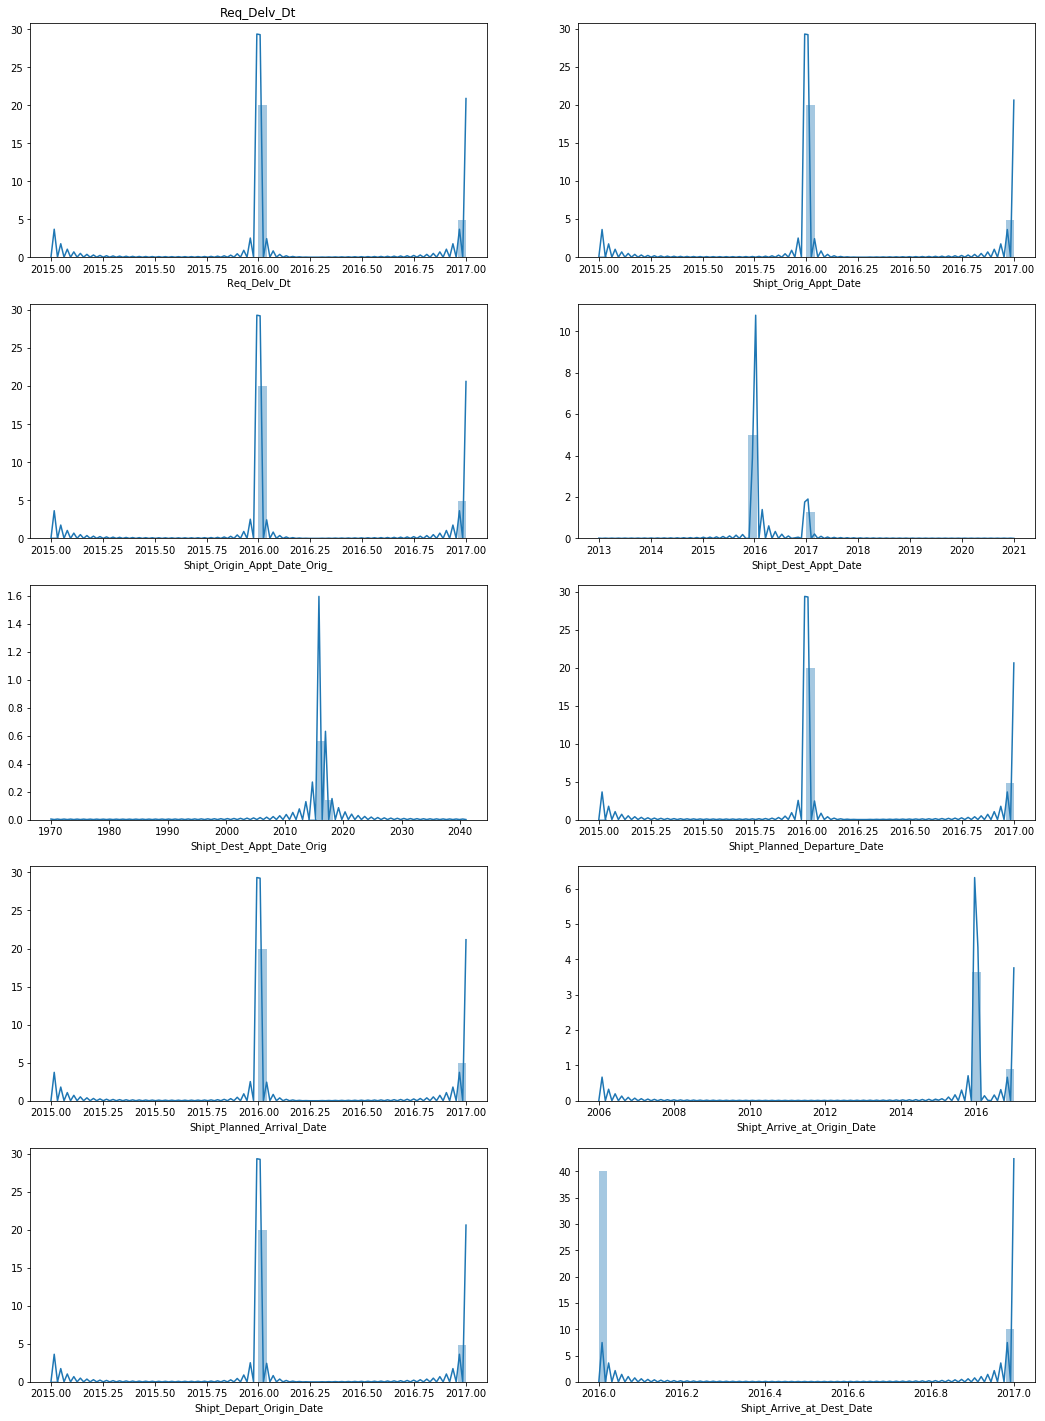

In [117]:
year1 = data['Req_Delv_Dt'].dt.year
year2 = data['Shipt_Orig_Appt_Date'].dt.year
year3 = data['Shipt_Origin_Appt_Date_Orig_'].dt.year
year4 = data['Shipt_Dest_Appt_Date'].dt.year
year5 = data['Shipt_Dest_Appt_Date_Orig'].dt.year
year6 = data['Shipt_Planned_Departure_Date'].dt.year
year7 = data['Shipt_Planned_Arrival_Date'].dt.year
year8 = data['Shipt_Arrive_at_Origin_Date'].dt.year
year9 = data['Shipt_Depart_Origin_Date'].dt.year
year10 = data['Shipt_Arrive_at_Dest_Date'].dt.year

# remove na's
year1 = year1.dropna()
year2 = year2.dropna()
year3 = year3.dropna()
year4 = year4.dropna()
year5 = year5.dropna()
year6 = year6.dropna()
year7 = year7.dropna()
year8 = year8.dropna()
year9 = year9.dropna()
year10 = year10.dropna()

# plot the day of the month
f,ax = plt.subplots(5,2, figsize=(18,25))

sns.distplot(year1,ax=ax[0, 0])
ax[0,0].set_title('Req_Delv_Dt')

sns.distplot(year2,ax=ax[0, 1])
#ax[0,1].set_title('Shipt_Orig_Appt_Date')

sns.distplot(year3,ax=ax[1, 0])
#ax[1,0].set_title('Shipt_Origin_Appt_Date_Orig_')

sns.distplot(year4,ax=ax[1, 1])
#ax[1,1].set_title('Shipt_Dest_Appt_Date')

sns.distplot(year5,ax=ax[2, 0])
#ax[2,0].set_title('Req_Delv_Dt')

sns.distplot(year6,ax=ax[2, 1])
#ax[2,1].set_title('Req_Delv_Dt')

sns.distplot(year7,ax=ax[3, 0])
#ax[3,0].set_title('Req_Delv_Dt')

sns.distplot(year8,ax=ax[3, 1])
#ax[3,1].set_title('Req_Delv_Dt')

sns.distplot(year9,ax=ax[4, 0])
#ax[4,0].set_title('Req_Delv_Dt')

sns.distplot(year10,ax=ax[4, 1])
#ax[4,1].set_title('Req_Delv_Dt')

plt.show()

### All the dates should be in between 2015 and 2017. Lets look at those that aren't

### Change dates earlier than 2015

In [128]:
#Lets look at Shipt_Dest_Appt_Date
data.query("Shipt_Dest_Appt_Date <'2015-01-01'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
26910,2016-05-31,T002,NaT,NaN,NaT,NaN,NaN,2013-06-03,1:30 PM,2016-05-31,...,Tuesday,NaN,NaN,Monday,Tuesday,Wednesday,Thursday,Wednesday,Wednesday,Friday


In [131]:
# Lets take another look at Shipt_Dest_Appt_Date
data.Shipt_Dest_Appt_Date.sort_values(ascending=True).head()

# the Year 2013 should probably be changed to 2016

26910   2013-06-03
4602    2015-01-06
4601    2015-01-06
18724   2015-03-25
6553    2015-12-28
Name: Shipt_Dest_Appt_Date, dtype: datetime64[ns]

In [140]:
# change the year to the correct year
data.set_value(26910, 'Shipt_Dest_Appt_Date', pd.to_datetime('2016-06-03'))

C:\Users\mailm_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
0,2017-03-24,C001,2017-03-23,10:00 AM,2017-03-23,10:00 AM,NA-Normal Appointment,2017-03-24,10:00 AM,2017-03-24,...,Friday,Thursday,Thursday,Friday,Friday,Thursday,Friday,Thursday,Thursday,Friday
1,2017-03-22,T002,NaT,NaN,NaT,NaN,NaN,2017-03-22,2:00 PM,2017-03-22,...,Wednesday,NaN,NaN,Wednesday,Wednesday,Tuesday,Wednesday,Wednesday,Wednesday,Wednesday
2,2017-03-26,T002,2017-03-24,11:00 AM,2017-03-24,11:00 AM,NA-Normal Appointment,2017-03-26,11:30 PM,2017-03-26,...,Sunday,Friday,Friday,Sunday,Sunday,Friday,Sunday,Friday,Friday,Friday
3,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday
4,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday
5,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday
6,2017-03-22,D003,2017-03-21,3:05 PM,2017-03-21,3:05 PM,NA-Normal Appointment,2017-03-22,7:00 AM,2017-03-22,...,Wednesday,Tuesday,Tuesday,Wednesday,Wednesday,Tuesday,Wednesday,Tuesday,Tuesday,Tuesday
7,2017-03-21,C001,2017-03-20,3:05 PM,2017-03-20,3:05 PM,NA-Normal Appointment,2017-03-21,6:00 AM,2017-03-21,...,Tuesday,Monday,Monday,Tuesday,Tuesday,Monday,Tuesday,Monday,Monday,Tuesday
8,2017-03-21,C001,2017-03-20,12:05 PM,2017-03-20,12:05 PM,NA-Normal Appointment,2017-03-21,1:30 PM,2017-03-21,...,Tuesday,Monday,Monday,Tuesday,Tuesday,Monday,Tuesday,Monday,Monday,Tuesday
9,2017-03-21,C001,2017-03-20,12:05 PM,2017-03-20,12:05 PM,NA-Normal Appointment,2017-03-21,1:30 PM,2017-03-21,...,Tuesday,Monday,Monday,Tuesday,Tuesday,Monday,Tuesday,Monday,Monday,Tuesday


In [146]:
#Lets check to make sure it was changed
data.iloc[26910, 0:8] 

Req_Delv_Dt                     2016-05-31 00:00:00
Cust_Hier1                                     T002
Shipt_Orig_Appt_Date                            NaT
Shipt_Orig_Appt_Time                            NaN
Shipt_Origin_Appt_Date_Orig_                    NaT
Shipt_Origin_Appt_Time_Orig                     NaN
Shipment_Origin_Appt_Reason                     NaN
Shipt_Dest_Appt_Date            2016-06-03 00:00:00
Name: 26910, dtype: object

In [120]:
# Lets look at Shipt_Arrive_at_Origin_Date
data.query("Shipt_Arrive_at_Origin_Date <'2015-01-01'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
42187,2016-08-21,D003,2016-08-19,6:00 PM,2016-08-19,6:00 PM,NA-Normal Appointment,2016-08-23,10:00 PM,2016-08-21,...,Sunday,Friday,Friday,Tuesday,Sunday,Friday,Sunday,Sunday,Saturday,Sunday


In [132]:
data.Shipt_Arrive_at_Origin_Date.sort_values(ascending=True).head()
# The year 2006 should probably be changed to 2016

42187   2006-08-20
5151    2015-12-17
9837    2015-12-19
9836    2015-12-19
9835    2015-12-19
Name: Shipt_Arrive_at_Origin_Date, dtype: datetime64[ns]

In [147]:
# change the year to the correct year
data.set_value(42187, 'Shipt_Arrive_at_Origin_Date', pd.to_datetime('2016-08-20'))

C:\Users\mailm_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
0,2017-03-24,C001,2017-03-23,10:00 AM,2017-03-23,10:00 AM,NA-Normal Appointment,2017-03-24,10:00 AM,2017-03-24,...,Friday,Thursday,Thursday,Friday,Friday,Thursday,Friday,Thursday,Thursday,Friday
1,2017-03-22,T002,NaT,NaN,NaT,NaN,NaN,2017-03-22,2:00 PM,2017-03-22,...,Wednesday,NaN,NaN,Wednesday,Wednesday,Tuesday,Wednesday,Wednesday,Wednesday,Wednesday
2,2017-03-26,T002,2017-03-24,11:00 AM,2017-03-24,11:00 AM,NA-Normal Appointment,2017-03-26,11:30 PM,2017-03-26,...,Sunday,Friday,Friday,Sunday,Sunday,Friday,Sunday,Friday,Friday,Friday
3,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday
4,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday
5,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday
6,2017-03-22,D003,2017-03-21,3:05 PM,2017-03-21,3:05 PM,NA-Normal Appointment,2017-03-22,7:00 AM,2017-03-22,...,Wednesday,Tuesday,Tuesday,Wednesday,Wednesday,Tuesday,Wednesday,Tuesday,Tuesday,Tuesday
7,2017-03-21,C001,2017-03-20,3:05 PM,2017-03-20,3:05 PM,NA-Normal Appointment,2017-03-21,6:00 AM,2017-03-21,...,Tuesday,Monday,Monday,Tuesday,Tuesday,Monday,Tuesday,Monday,Monday,Tuesday
8,2017-03-21,C001,2017-03-20,12:05 PM,2017-03-20,12:05 PM,NA-Normal Appointment,2017-03-21,1:30 PM,2017-03-21,...,Tuesday,Monday,Monday,Tuesday,Tuesday,Monday,Tuesday,Monday,Monday,Tuesday
9,2017-03-21,C001,2017-03-20,12:05 PM,2017-03-20,12:05 PM,NA-Normal Appointment,2017-03-21,1:30 PM,2017-03-21,...,Tuesday,Monday,Monday,Tuesday,Tuesday,Monday,Tuesday,Monday,Monday,Tuesday


In [133]:
# Lets look at Shipt_Dest_Appt_Date_Orig
data.query("Shipt_Dest_Appt_Date_Orig <'2015-01-01'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
216,2017-03-21,C001,2017-03-20,2:15 PM,2017-03-20,2:15 PM,NA-Normal Appointment,2017-03-21,6:00 AM,1970-03-23,...,Tuesday,Monday,Monday,Tuesday,Monday,Monday,Tuesday,Monday,Monday,Tuesday
217,2017-03-21,C001,2017-03-20,2:15 PM,2017-03-20,2:15 PM,NA-Normal Appointment,2017-03-21,6:00 AM,1970-03-23,...,Tuesday,Monday,Monday,Tuesday,Monday,Monday,Tuesday,Monday,Monday,Tuesday


In [134]:
data.Shipt_Dest_Appt_Date_Orig.sort_values(ascending=True).head()
# This should be changed to 2017

217    1970-03-23
216    1970-03-23
4547   2015-01-04
4250   2015-01-04
4546   2015-01-04
Name: Shipt_Dest_Appt_Date_Orig, dtype: datetime64[ns]

In [149]:
data.set_value(217, 'Shipt_Dest_Appt_Date_Orig', pd.to_datetime('2017-03-23'))
data.set_value(216, 'Shipt_Dest_Appt_Date_Orig', pd.to_datetime('2017-03-23'))


C:\Users\mailm_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
C:\Users\mailm_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
0,2017-03-24,C001,2017-03-23,10:00 AM,2017-03-23,10:00 AM,NA-Normal Appointment,2017-03-24,10:00 AM,2017-03-24,...,Friday,Thursday,Thursday,Friday,Friday,Thursday,Friday,Thursday,Thursday,Friday
1,2017-03-22,T002,NaT,NaN,NaT,NaN,NaN,2017-03-22,2:00 PM,2017-03-22,...,Wednesday,NaN,NaN,Wednesday,Wednesday,Tuesday,Wednesday,Wednesday,Wednesday,Wednesday
2,2017-03-26,T002,2017-03-24,11:00 AM,2017-03-24,11:00 AM,NA-Normal Appointment,2017-03-26,11:30 PM,2017-03-26,...,Sunday,Friday,Friday,Sunday,Sunday,Friday,Sunday,Friday,Friday,Friday
3,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday
4,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday
5,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday
6,2017-03-22,D003,2017-03-21,3:05 PM,2017-03-21,3:05 PM,NA-Normal Appointment,2017-03-22,7:00 AM,2017-03-22,...,Wednesday,Tuesday,Tuesday,Wednesday,Wednesday,Tuesday,Wednesday,Tuesday,Tuesday,Tuesday
7,2017-03-21,C001,2017-03-20,3:05 PM,2017-03-20,3:05 PM,NA-Normal Appointment,2017-03-21,6:00 AM,2017-03-21,...,Tuesday,Monday,Monday,Tuesday,Tuesday,Monday,Tuesday,Monday,Monday,Tuesday
8,2017-03-21,C001,2017-03-20,12:05 PM,2017-03-20,12:05 PM,NA-Normal Appointment,2017-03-21,1:30 PM,2017-03-21,...,Tuesday,Monday,Monday,Tuesday,Tuesday,Monday,Tuesday,Monday,Monday,Tuesday
9,2017-03-21,C001,2017-03-20,12:05 PM,2017-03-20,12:05 PM,NA-Normal Appointment,2017-03-21,1:30 PM,2017-03-21,...,Tuesday,Monday,Monday,Tuesday,Tuesday,Monday,Tuesday,Monday,Monday,Tuesday


### Change dates above 2017

In [154]:
# Lets look at Shipt_Dest_Appt_Date_Orig
data.query("Shipt_Dest_Appt_Date_Orig >'2018-01-01'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
19096,2016-03-16,D003,2016-03-21,4:00 PM,2016-03-21,4:30 PM,AD-Customer Requested Future Delivery,2016-03-22,5:00 AM,2022-03-16,...,Wednesday,Monday,Monday,Tuesday,Wednesday,Monday,Friday,Monday,Monday,Tuesday
19097,2016-03-16,D003,2016-03-21,4:00 PM,2016-03-21,4:30 PM,AD-Customer Requested Future Delivery,2016-03-22,5:00 AM,2022-03-16,...,Wednesday,Monday,Monday,Tuesday,Wednesday,Monday,Friday,Monday,Monday,Tuesday
30421,2016-06-28,D003,2016-06-27,6:00 PM,2016-06-25,8:00 PM,AV-Exceeds Service Limitations,2016-06-29,6:00 PM,2019-06-29,...,Tuesday,Monday,Saturday,Wednesday,Saturday,Saturday,Tuesday,Sunday,Sunday,Wednesday
30422,2016-06-28,D003,2016-06-27,6:00 PM,2016-06-25,8:00 PM,AV-Exceeds Service Limitations,2016-06-29,6:00 PM,2019-06-29,...,Tuesday,Monday,Saturday,Wednesday,Saturday,Saturday,Tuesday,Sunday,Sunday,Wednesday
58764,2016-12-13,D003,2016-12-12,6:00 PM,2016-12-12,6:00 PM,NS-Normal Status,2018-12-13,6:00 PM,2018-12-13,...,Tuesday,Monday,Monday,Thursday,Thursday,Tuesday,Tuesday,Tuesday,Tuesday,Tuesday
71566,2017-02-24,C001,2017-02-22,11:59 PM,2017-02-22,11:59 PM,NS-Normal Status,2017-02-24,6:00 AM,2041-02-22,...,Friday,Wednesday,Wednesday,Friday,Friday,Wednesday,Friday,Wednesday,Wednesday,Friday
72879,2017-02-23,D003,2017-02-22,7:00 PM,2017-02-22,7:00 PM,NS-Normal Status,2021-02-22,10:00 PM,2021-02-22,...,Thursday,Wednesday,Wednesday,Monday,Monday,Wednesday,Thursday,Wednesday,Wednesday,Thursday
72880,2017-02-23,D003,2017-02-22,7:00 PM,2017-02-22,7:00 PM,NS-Normal Status,2021-02-22,10:00 PM,2021-02-22,...,Thursday,Wednesday,Wednesday,Monday,Monday,Wednesday,Thursday,Wednesday,Wednesday,Thursday


In [158]:
data.iloc[19096, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] = pd.to_datetime('2016-03-16')
data.iloc[19097, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] = pd.to_datetime('2016-03-16')
data.iloc[30421, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] = pd.to_datetime('2016-06-29')
data.iloc[30422, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] = pd.to_datetime('2016-06-29')
data.iloc[58764, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] = pd.to_datetime('2016-12-13')
data.iloc[71566, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] = pd.to_datetime('2017-02-22')
data.iloc[72879, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] = pd.to_datetime('2017-02-22')
data.iloc[72880, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] = pd.to_datetime('2017-02-22')


In [162]:
#Lets check
data.iloc[19096, data.columns.get_loc('Shipt_Dest_Appt_Date_Orig')] 


Timestamp('2016-03-16 00:00:00')

In [163]:
# Lets look at Shipt_Dest_Appt_Date_Orig
data.query("Shipt_Dest_Appt_Date_Orig >'2018-01-01'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday


In [164]:
# Lets look at Shipt_Dest_Appt_Date
data.query("Shipt_Dest_Appt_Date >'2018-01-01'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
30122,2016-06-22,D003,2016-06-21,8:00 AM,2016-06-21,4:00 PM,NS-Normal Status,2018-06-22,6:00 PM,2016-06-22,...,Wednesday,Tuesday,Tuesday,Friday,Wednesday,Tuesday,Wednesday,Tuesday,Tuesday,Wednesday
42162,2016-08-19,D003,2016-08-18,1:00 PM,2016-08-18,4:00 PM,NS-Normal Status,2019-08-19,9:00 AM,2016-08-19,...,Friday,Thursday,Thursday,Monday,Friday,Thursday,Friday,Friday,Friday,Friday
58764,2016-12-13,D003,2016-12-12,6:00 PM,2016-12-12,6:00 PM,NS-Normal Status,2018-12-13,6:00 PM,2016-12-13,...,Tuesday,Monday,Monday,Thursday,Thursday,Tuesday,Tuesday,Tuesday,Tuesday,Tuesday
72879,2017-02-23,D003,2017-02-22,7:00 PM,2017-02-22,7:00 PM,NS-Normal Status,2021-02-22,10:00 PM,2017-02-22,...,Thursday,Wednesday,Wednesday,Monday,Monday,Wednesday,Thursday,Wednesday,Wednesday,Thursday
72880,2017-02-23,D003,2017-02-22,7:00 PM,2017-02-22,7:00 PM,NS-Normal Status,2021-02-22,10:00 PM,2017-02-22,...,Thursday,Wednesday,Wednesday,Monday,Monday,Wednesday,Thursday,Wednesday,Wednesday,Thursday


In [166]:
# Lets change the year to the correct years

data.iloc[30122, data.columns.get_loc('Shipt_Dest_Appt_Date')]= pd.to_datetime('2016-06-22')
data.iloc[42162, data.columns.get_loc('Shipt_Dest_Appt_Date')]= pd.to_datetime('2016-08-19')
data.iloc[58764, data.columns.get_loc('Shipt_Dest_Appt_Date')]= pd.to_datetime('2016-12-13')
data.iloc[72879, data.columns.get_loc('Shipt_Dest_Appt_Date')]= pd.to_datetime('2017-02-22')
data.iloc[72880, data.columns.get_loc('Shipt_Dest_Appt_Date')]= pd.to_datetime('2017-02-22')

In [167]:
# Lets check Shipt_Dest_Appt_Date
data.query("Shipt_Dest_Appt_Date >'2018-01-01'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday


C:\Users\mailm_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


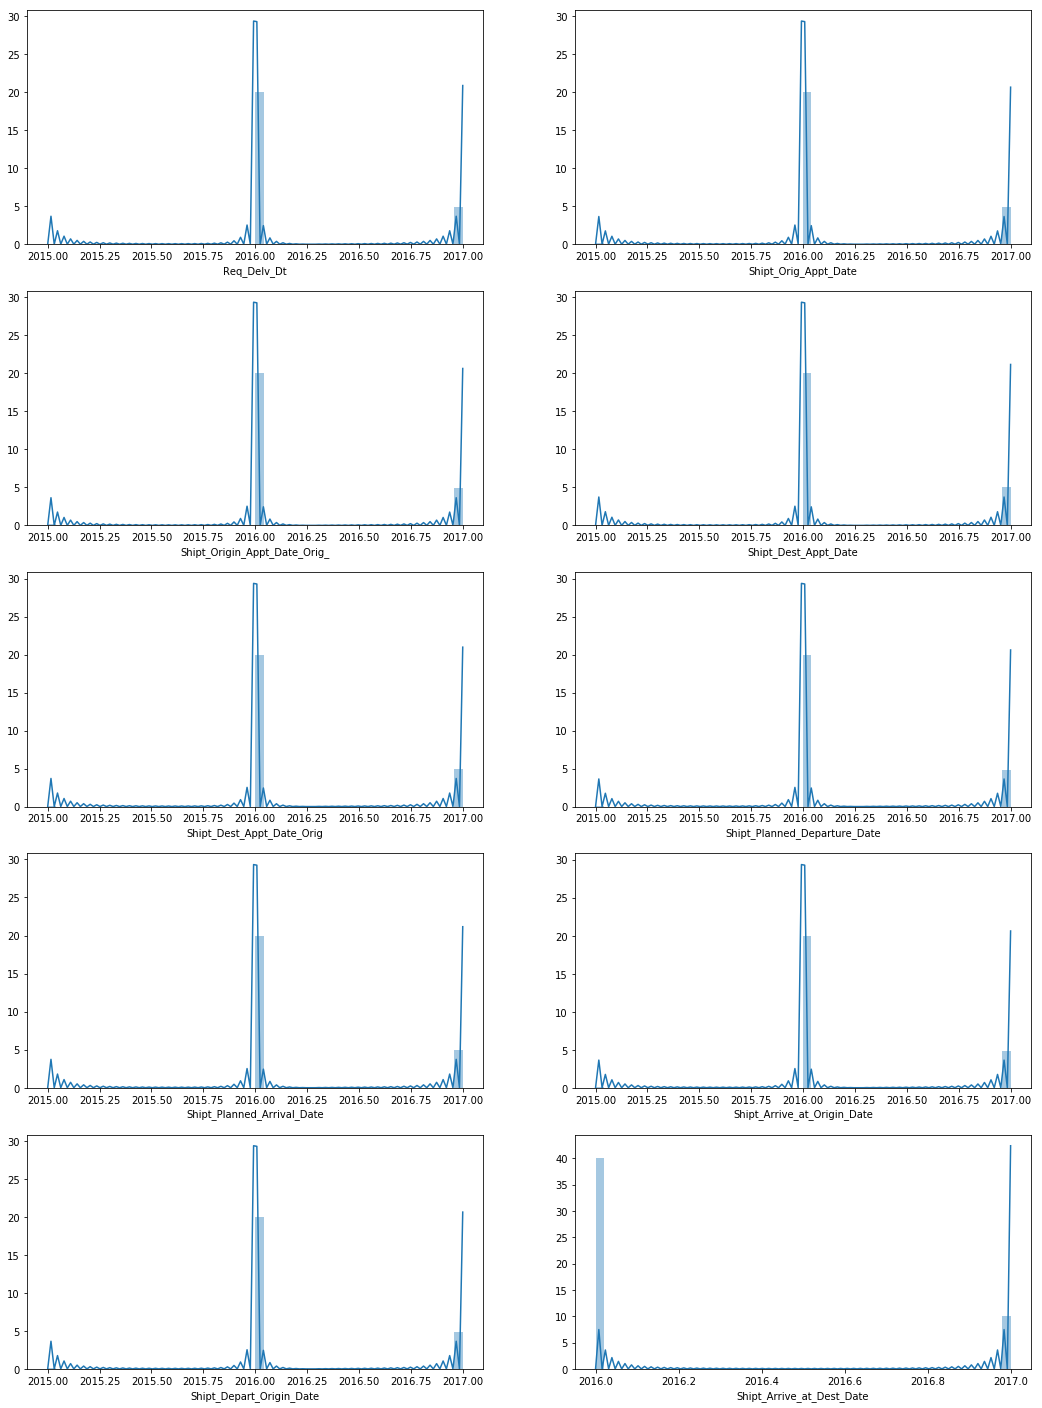

In [168]:
#check all the dates again
year1 = data['Req_Delv_Dt'].dt.year
year2 = data['Shipt_Orig_Appt_Date'].dt.year
year3 = data['Shipt_Origin_Appt_Date_Orig_'].dt.year
year4 = data['Shipt_Dest_Appt_Date'].dt.year
year5 = data['Shipt_Dest_Appt_Date_Orig'].dt.year
year6 = data['Shipt_Planned_Departure_Date'].dt.year
year7 = data['Shipt_Planned_Arrival_Date'].dt.year
year8 = data['Shipt_Arrive_at_Origin_Date'].dt.year
year9 = data['Shipt_Depart_Origin_Date'].dt.year
year10 = data['Shipt_Arrive_at_Dest_Date'].dt.year

# remove na's
year1 = year1.dropna()
year2 = year2.dropna()
year3 = year3.dropna()
year4 = year4.dropna()
year5 = year5.dropna()
year6 = year6.dropna()
year7 = year7.dropna()
year8 = year8.dropna()
year9 = year9.dropna()
year10 = year10.dropna()

# plot the day of the month
f,ax = plt.subplots(5,2, figsize=(18,25))

sns.distplot(year1,ax=ax[0, 0])

sns.distplot(year2,ax=ax[0, 1])

sns.distplot(year3,ax=ax[1, 0])

sns.distplot(year4,ax=ax[1, 1])

sns.distplot(year5,ax=ax[2, 0])

sns.distplot(year6,ax=ax[2, 1])

sns.distplot(year7,ax=ax[3, 0])

sns.distplot(year8,ax=ax[3, 1])

sns.distplot(year9,ax=ax[4, 0])

sns.distplot(year10,ax=ax[4, 1])

plt.show()

In [207]:
def plot_new_feature_distribution(df1,features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(5,2,figsize=(18,8))

    for feature in features:
        i += 1
        plt.subplot(5,2,i)
        sns.kdeplot(df1[feature],bw=0.5)
        plt.xlabel(feature, fontsize=11)
        #locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

In [210]:
dates= pd.concat([year1, year2,year3,year4,year5,year6,year7,year8,year8,year10],axis=1)


C:\Users\mailm_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [187]:
clean_dates=dates.dropna()

C:\Users\mailm_000\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
C:\Users\mailm_000\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


<Figure size 432x288 with 0 Axes>

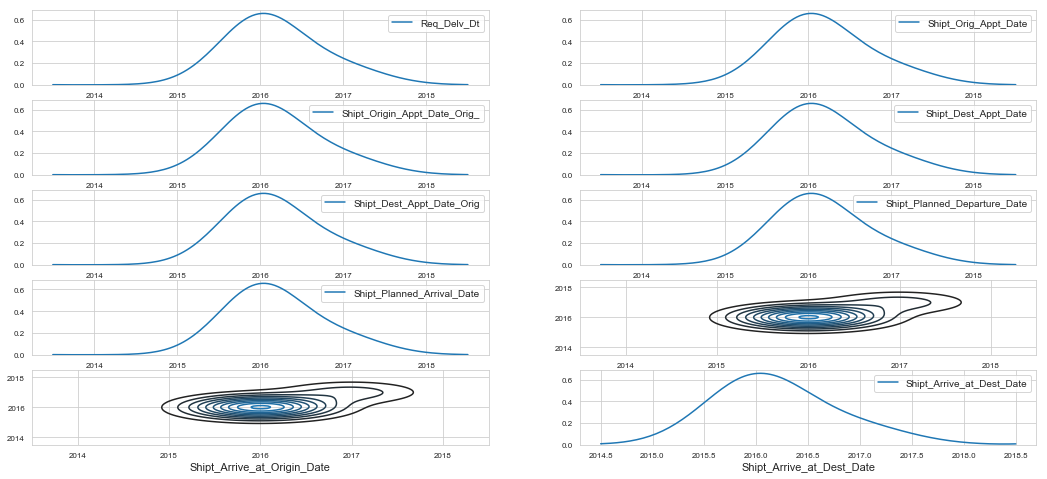

In [208]:
features = clean_dates.columns.values[0:]

plot_new_feature_distribution(clean_dates,features)

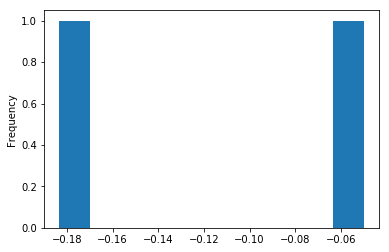

In [71]:
lowACR =data[data['Average_Carrier_Response_(Min)']<0]
lowACR['Average_Carrier_Response_(Min)'].plot(kind='hist')

In [215]:
lowACR

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
18037,2016-03-10,C001,NaT,NaN,NaT,NaN,NaN,2016-03-09,7:00 AM,2016-03-09,...,Thursday,NaN,NaN,Wednesday,Wednesday,Monday,Thursday,Monday,Monday,Wednesday
19780,2016-03-15,D003,2016-03-11,12:35 PM,2016-03-11,12:35 PM,NA-Normal Appointment,2016-03-15,9:00 AM,2016-03-15,...,Tuesday,Friday,Friday,Tuesday,Tuesday,Friday,Tuesday,Friday,Friday,Tuesday


In [223]:
# getthe absolute value of the average carrier response time
data['Average_Carrier_Response_(Min)']=data['Average_Carrier_Response_(Min)'].abs()
data['Average_Carrier_Response_(Min)']=pd.to_numeric(data['Average_Carrier_Response_(Min)'])

In [225]:
#check that there are only positive values
lowACR =data[data['Average_Carrier_Response_(Min)']<0]
lowACR

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday


## Convert the dates to day of the week

In [228]:

data['Req_Delv_Dt_Weekday'] = data.Req_Delv_Dt.dt.weekday_name

data['Shipt_Orig_Appt_Weekday']=data.Shipt_Orig_Appt_Date.dt.weekday_name


data['Shipt_Origin_Appt_Date_Orig_Weekday'] = data.Shipt_Origin_Appt_Date_Orig_.dt.weekday_name

data['Shipt_Dest_Appt_Date_Weekday'] = data.Shipt_Dest_Appt_Date.dt.weekday_name


data['Shipt_Dest_Appt_Date_Orig_Weekday'] = data.Shipt_Dest_Appt_Date_Orig.dt.weekday_name

data['Shipt_Planned_Departure_Date_Weekday'] = data.Shipt_Planned_Departure_Date.dt.weekday_name

data['Shipt_Planned_Arrival_Date_Weekday'] = data.Shipt_Planned_Arrival_Date.dt.weekday_name

data['Shipt_Arrive_at_Origin_Date_Weekday'] = data.Shipt_Arrive_at_Origin_Date.dt.weekday_name

data['Shipt_Depart_Origin_Date_Weekday'] = data.Shipt_Depart_Origin_Date.dt.weekday_name

data['Shipt_Arrive_at_Dest_Date_Weekday'] = data.Shipt_Arrive_at_Dest_Date.dt.weekday_name



In [229]:
# review the data to make sure the conversion is correct
data.head()

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
0,2017-03-24,C001,2017-03-23,10:00 AM,2017-03-23,10:00 AM,NA-Normal Appointment,2017-03-24,10:00 AM,2017-03-24,...,Friday,Thursday,Thursday,Friday,Friday,Thursday,Friday,Thursday,Thursday,Friday
1,2017-03-22,T002,NaT,NaN,NaT,NaN,NaN,2017-03-22,2:00 PM,2017-03-22,...,Wednesday,NaN,NaN,Wednesday,Wednesday,Tuesday,Wednesday,Wednesday,Wednesday,Wednesday
2,2017-03-26,T002,2017-03-24,11:00 AM,2017-03-24,11:00 AM,NA-Normal Appointment,2017-03-26,11:30 PM,2017-03-26,...,Sunday,Friday,Friday,Sunday,Sunday,Friday,Sunday,Friday,Friday,Friday
3,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday
4,2017-03-22,C001,2017-03-20,11:00 AM,2017-03-20,11:00 AM,NA-Normal Appointment,2017-03-22,5:00 AM,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday


## Convert the time to a usable format

In [230]:
#this is an error in the data found from earlier cleaning efforts
data.query("Shipt_Depart_Origin_Time=='15:00.0'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
1046,2017-03-29,T002,NaT,NaN,NaT,NaN,NaN,2017-03-29,4:00 PM,2017-03-29,...,Wednesday,NaN,NaN,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday
1047,2017-03-29,T002,NaT,NaN,NaT,NaN,NaN,2017-03-29,4:00 PM,2017-03-29,...,Wednesday,NaN,NaN,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday
1048,2017-03-29,T002,NaT,NaN,NaT,NaN,NaN,2017-03-29,4:00 PM,2017-03-29,...,Wednesday,NaN,NaN,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday,Wednesday


In [234]:
#correcting the data
data.iloc[1046, data.columns.get_loc('Shipt_Depart_Origin_Time')]= '3:00 PM'
data.iloc[1047, data.columns.get_loc('Shipt_Depart_Origin_Time')]= '3:00 PM'
data.iloc[1048, data.columns.get_loc('Shipt_Depart_Origin_Time')]= '3:00 PM'


In [235]:
#making sure the change went through
data.query("Shipt_Depart_Origin_Time=='15:00.0'")

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday


In [236]:
# converting the times to military time
data['Shipt_Orig_Appt_Time'] = pd.to_datetime(data['Shipt_Origin_Appt_Time_Orig'],format ='%I:%M %p').dt.time 

data['Shipt_Origin_Appt_Time_Orig'] = pd.to_datetime(data['Shipt_Origin_Appt_Time_Orig'],format ='%I:%M %p').dt.time 

data['Shipt_Dest_Appt_Time'] = pd.to_datetime(data['Shipt_Dest_Appt_Time'],format ='%I:%M %p').dt.time 

data['Shipt_Dest_Appt_Time_Orig'] = pd.to_datetime(data['Shipt_Dest_Appt_Time_Orig'],format ='%I:%M %p').dt.time 

data['Shipt_Planned_Departure_Time'] = pd.to_datetime(data['Shipt_Planned_Departure_Time'],format ='%I:%M %p').dt.time 

data['Shipt_Planned_Arrival_Time'] = pd.to_datetime(data['Shipt_Planned_Arrival_Time'],format ='%I:%M %p').dt.time 

data['Shipt_Arrive_at_Origin_Time'] = pd.to_datetime(data['Shipt_Arrive_at_Origin_Time'],format ='%I:%M %p').dt.time 

data['Shipt_Depart_Origin_Time'] = pd.to_datetime(data['Shipt_Depart_Origin_Time'],format ='%I:%M %p').dt.time 

data['Shipt_Arrive_at_Dest_Time'] = pd.to_datetime(data['Shipt_Arrive_at_Dest_Time'],format ='%I:%M %p').dt.time 



In [244]:
# converting the times to military time
data['Shipt_Orig_Appt_Time'] = pd.to_datetime(data['Shipt_Orig_Appt_Time'],format ='%H:%M:%S')

data['Shipt_Origin_Appt_Time_Orig'] = pd.to_datetime(data['Shipt_Origin_Appt_Time_Orig'],format ='%H:%M:%S')

data['Shipt_Dest_Appt_Time'] = pd.to_datetime(data['Shipt_Dest_Appt_Time'],format ='%H:%M:%S')

data['Shipt_Dest_Appt_Time_Orig'] = pd.to_datetime(data['Shipt_Dest_Appt_Time_Orig'],format ='%H:%M:%S')

data['Shipt_Planned_Departure_Time'] = pd.to_datetime(data['Shipt_Planned_Departure_Time'],format ='%H:%M:%S') 

data['Shipt_Planned_Arrival_Time'] = pd.to_datetime(data['Shipt_Planned_Arrival_Time'],format ='%H:%M:%S')

data['Shipt_Arrive_at_Origin_Time'] = pd.to_datetime(data['Shipt_Arrive_at_Origin_Time'],format ='%H:%M:%S') 

data['Shipt_Depart_Origin_Time'] = pd.to_datetime(data['Shipt_Depart_Origin_Time'],format ='%H:%M:%S')

data['Shipt_Arrive_at_Dest_Time'] = pd.to_datetime(data['Shipt_Arrive_at_Dest_Time'],format ='%H:%M:%S')




In [271]:
data['Shipt_Orig_Appt_Time_POD'] = pd.to_numeric(data['Shipt_Orig_Appt_Time'].dt.hour)
data['Shipt_Origin_Appt_Time_Orig_POD'] = pd.to_numeric(data['Shipt_Origin_Appt_Time_Orig'].dt.hour)
data['Shipt_Dest_Appt_Time_POD'] = pd.to_numeric(data['Shipt_Dest_Appt_Time'].dt.hour)
data['Shipt_Dest_Appt_Time_Orig_POD'] = pd.to_numeric(data['Shipt_Dest_Appt_Time_Orig'].dt.hour)
data['Shipt_Planned_Departure_Time_POD'] = pd.to_numeric(data['Shipt_Planned_Departure_Time'].dt.hour)
data['Shipt_Planned_Arrival_Time_POD'] = pd.to_numeric(data['Shipt_Planned_Arrival_Time'].dt.hour)
data['Shipt_Arrive_at_Origin_Time_POD'] = pd.to_numeric(data['Shipt_Arrive_at_Origin_Time'].dt.hour)
data['Shipt_Depart_Origin_Time_POD'] = pd.to_numeric(data['Shipt_Depart_Origin_Time'].dt.hour)
data['Shipt_Arrive_at_Dest_Time_POD'] = pd.to_numeric(data['Shipt_Arrive_at_Dest_Time'].dt.hour)

In [266]:
data['Shipt_Orig_Appt_Time_POD']=data['Shipt_Orig_Appt_Time_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x > 17 and x<20) else ('Night' if x >=20 and x<=24 else 'NaN'))))    


In [272]:
data['Shipt_Origin_Appt_Time_Orig_POD']=data['Shipt_Origin_Appt_Time_Orig_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x > 17 and x<20) else ('Night' if x >=20 and x<=24 else 'NaN'))))    
data['Shipt_Dest_Appt_Time_POD']=data['Shipt_Dest_Appt_Time_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x > 17 and x<20) else ('Night' if x >=20 and x<=24 else 'NaN'))))    
data['Shipt_Dest_Appt_Time_Orig_POD']=data['Shipt_Dest_Appt_Time_Orig_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x > 17 and x<20) else ('Night' if x >=20 and x<=24 else 'NaN'))))    
data['Shipt_Planned_Departure_Time_POD']=data['Shipt_Planned_Departure_Time_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x > 17 and x<20) else ('Night' if x >=20 and x<=24 else 'NaN'))))    
data['Shipt_Planned_Arrival_Time_POD']=data['Shipt_Planned_Arrival_Time_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x > 17 and x<20) else ('Night' if x >=20 and x<=24 else 'NaN'))))    
data['Shipt_Arrive_at_Origin_Time_POD']=data['Shipt_Arrive_at_Origin_Time_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x > 17 and x<20) else ('Night' if x >=20 and x<=24 else 'NaN'))))    
data['Shipt_Depart_Origin_Time_POD']=data['Shipt_Depart_Origin_Time_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x > 17 and x<20) else ('Night' if x >=20 and x<=24 else 'NaN'))))    
data['Shipt_Arrive_at_Dest_Time_POD']=data['Shipt_Arrive_at_Dest_Time_POD'].map( lambda x: 'Afternoon' if (x >12 and x < 17) else ('Morning' if x<=12 else ('Evening' if (x > 17 and x<20) else ('Night' if x >=20 and x<=24 else 'NaN'))))    


In [273]:
data.head()

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Shipt_Orig_Appt_Time_POD,Shipt_Origin_Appt_POD,Shipt_Origin_Appt_Time_Orig_POD,Shipt_Dest_Appt_Time_POD,Shipt_Dest_Appt_Time_Orig_POD,Shipt_Planned_Departure_Time_POD,Shipt_Planned_Arrival_Time_POD,Shipt_Arrive_at_Origin_Time_POD,Shipt_Depart_Origin_Time_POD,Shipt_Arrive_at_Dest_Time_POD
0,2017-03-24,C001,2017-03-23,1900-01-01 10:00:00,2017-03-23,1900-01-01 10:00:00,NA-Normal Appointment,2017-03-24,1900-01-01 10:00:00,2017-03-24,...,Morning,Morning,Morning,Morning,Morning,NaN,Morning,Morning,Morning,Morning
1,2017-03-22,T002,NaT,NaT,NaT,NaT,NaN,2017-03-22,1900-01-01 14:00:00,2017-03-22,...,NaN,NaN,NaN,Afternoon,Morning,Morning,Morning,Morning,Morning,Morning
2,2017-03-26,T002,2017-03-24,1900-01-01 11:00:00,2017-03-24,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-26,1900-01-01 23:30:00,2017-03-26,...,Morning,Morning,Morning,Night,Morning,Morning,Morning,Morning,Afternoon,NaN
3,2017-03-22,C001,2017-03-20,1900-01-01 11:00:00,2017-03-20,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-22,1900-01-01 05:00:00,2017-03-22,...,Morning,Morning,Morning,Morning,Morning,NaN,Morning,Morning,Morning,Afternoon
4,2017-03-22,C001,2017-03-20,1900-01-01 11:00:00,2017-03-20,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-22,1900-01-01 05:00:00,2017-03-22,...,Morning,Morning,Morning,Morning,Morning,NaN,Morning,Morning,Morning,Afternoon


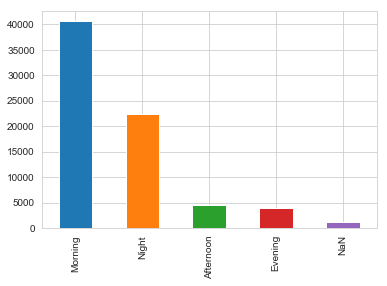

In [274]:
data['Shipt_Dest_Appt_Time_POD'].value_counts().plot(kind='bar')

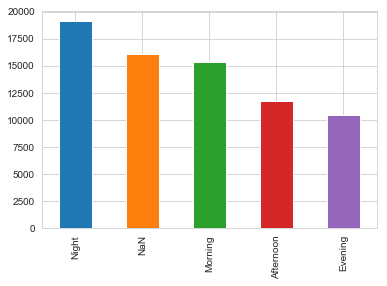

In [268]:
data['Shipt_Orig_Appt_Time_POD'].value_counts().plot(kind='bar')

In [245]:
data.head()

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Req_Delv_Dt_Weekday,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Date_Orig_Weekday,Shipt_Dest_Appt_Date_Weekday,Shipt_Dest_Appt_Date_Orig_Weekday,Shipt_Planned_Departure_Date_Weekday,Shipt_Planned_Arrival_Date_Weekday,Shipt_Arrive_at_Origin_Date_Weekday,Shipt_Depart_Origin_Date_Weekday,Shipt_Arrive_at_Dest_Date_Weekday
0,2017-03-24,C001,2017-03-23,1900-01-01 10:00:00,2017-03-23,1900-01-01 10:00:00,NA-Normal Appointment,2017-03-24,1900-01-01 10:00:00,2017-03-24,...,Friday,Thursday,Thursday,Friday,Friday,Thursday,Friday,Thursday,Thursday,Friday
1,2017-03-22,T002,NaT,NaT,NaT,NaT,NaN,2017-03-22,1900-01-01 14:00:00,2017-03-22,...,Wednesday,NaN,NaN,Wednesday,Wednesday,Tuesday,Wednesday,Wednesday,Wednesday,Wednesday
2,2017-03-26,T002,2017-03-24,1900-01-01 11:00:00,2017-03-24,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-26,1900-01-01 23:30:00,2017-03-26,...,Sunday,Friday,Friday,Sunday,Sunday,Friday,Sunday,Friday,Friday,Friday
3,2017-03-22,C001,2017-03-20,1900-01-01 11:00:00,2017-03-20,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-22,1900-01-01 05:00:00,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday
4,2017-03-22,C001,2017-03-20,1900-01-01 11:00:00,2017-03-20,1900-01-01 11:00:00,NA-Normal Appointment,2017-03-22,1900-01-01 05:00:00,2017-03-22,...,Wednesday,Monday,Monday,Wednesday,Wednesday,Monday,Wednesday,Monday,Monday,Wednesday


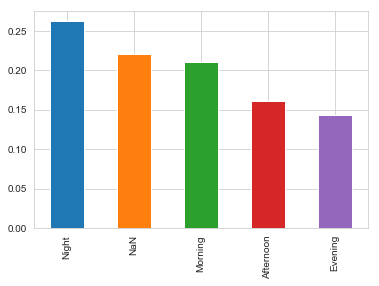

In [270]:
data['Shipt_Orig_Appt_Time_POD'].value_counts(normalize=True).plot(kind='bar')

In [112]:
data[data.duplicated()].head()

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,Expired,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Time_OrigX,new_time,Shipt_Origin_Appt_POD
2126,2017-03-15,C001,2017-03-13,06:00:00,2017-03-13,18:00:00,NA-Normal Appointment,2017-03-15,08:00:00,2017-03-15,...,0,0.0,Yes,1,14.700000,Primary,Monday,1900-01-01 18:00:00,18.0,Afternoon
2127,2017-03-15,C001,2017-03-13,06:00:00,2017-03-13,18:00:00,NA-Normal Appointment,2017-03-15,08:00:00,2017-03-15,...,0,0.0,Yes,1,14.700000,Primary,Monday,1900-01-01 18:00:00,18.0,Afternoon
2458,2017-03-13,C001,NaT,NaT,NaT,NaT,NaN,2017-03-13,05:00:00,2017-03-13,...,0,0.0,Yes,1,32.800000,Primary,NaN,NaT,NaN,NaN
2459,2017-03-13,C001,NaT,NaT,NaT,NaT,NaN,2017-03-13,05:00:00,2017-03-13,...,0,0.0,Yes,1,32.800000,Primary,NaN,NaT,NaN,NaN
7531,2016-02-05,C001,2016-02-04,01:00:00,2016-02-04,13:00:00,NA-Normal Appointment,2016-02-05,06:00:00,2016-02-05,...,0,0.0,No,0,1.666667,Secondary,Thursday,1900-01-01 13:00:00,13.0,Afternoon


In [113]:
data['Req_Delv_Dt_Weekday']=data.Req_Delv_Dt.dt.weekday_name

In [114]:
data['Req_Delv_Dt_Weekday'].head()

0       Friday
1    Wednesday
2       Sunday
3    Wednesday
4    Wednesday
Name: Req_Delv_Dt_Weekday, dtype: object

In [115]:
data['Req_Delv_Dt_Weekday'].value_counts(normalize=True)

Wednesday    0.211552
Monday       0.162011
Tuesday      0.155234
Friday       0.153327
Thursday     0.140499
Sunday       0.090163
Saturday     0.087214
Name: Req_Delv_Dt_Weekday, dtype: float64

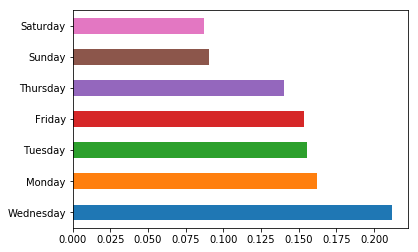

In [116]:
data['Req_Delv_Dt_Weekday'].value_counts(normalize=True).plot(kind='barh')

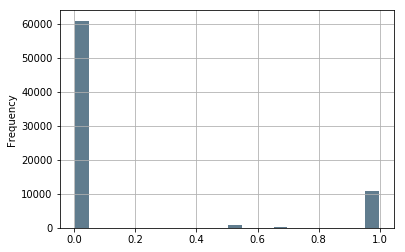

In [117]:
data['%_Declined'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')



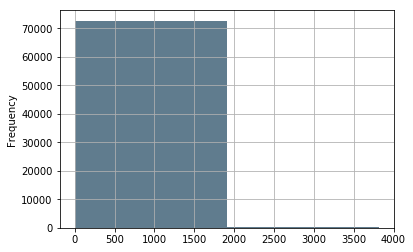

In [118]:
data['Average_Carrier_Response_(Min)'].plot.hist(grid=True, bins=2, rwidth=10,color='#607c8e')


In [119]:
max(data['Average_Carrier_Response_(Min)'])

3819.333333

In [120]:
min(data['Average_Carrier_Response_(Min)'])

-0.18333333300000001

Text(0.5,1,'Total_Tenders')

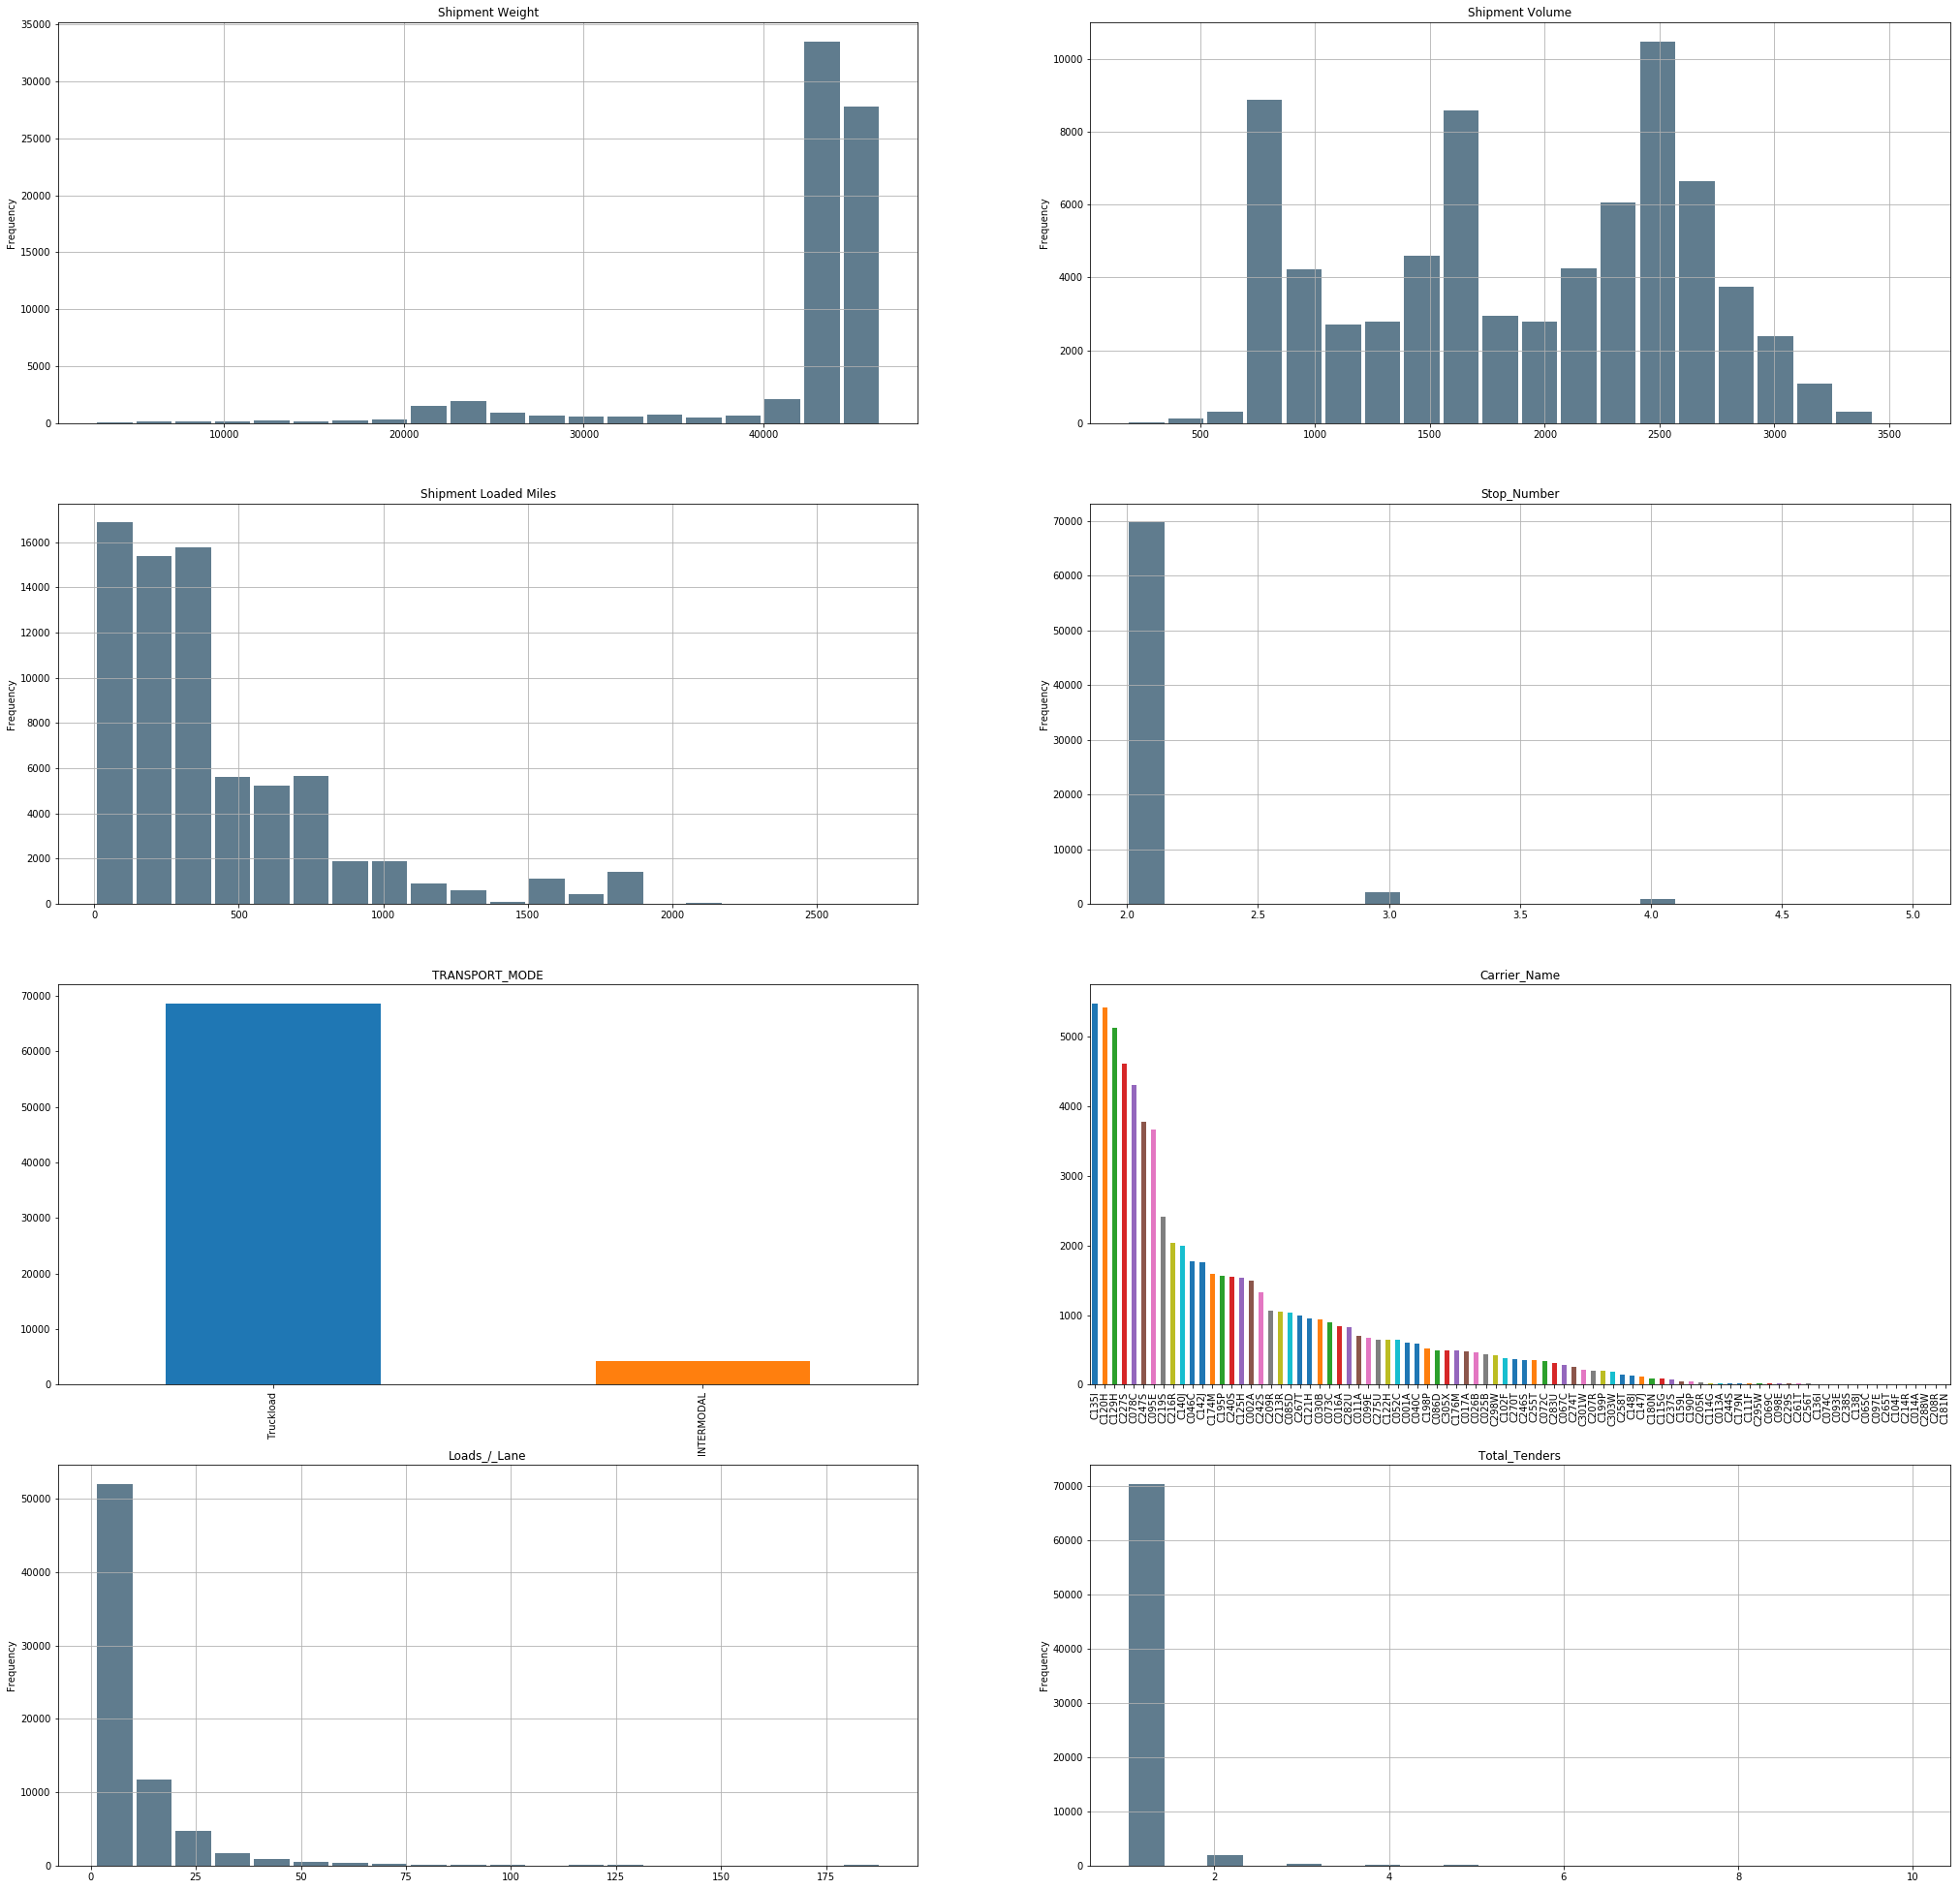

In [121]:
plt.figure(figsize=(35,35))
plt.subplot(4,2,1);data['Shipment_Weight_(lb)'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e');plt.title('Shipment Weight')
plt.subplot(4,2,2);data['Shipment_Volume_(cubic_ft)'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e');plt.title('Shipment Volume')
plt.subplot(4,2,3);data['Shipment_Loaded_Miles'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e');plt.title('Shipment Loaded Miles')
plt.subplot(4,2,4);data['Stop_Number'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e');plt.title('Stop_Number')
plt.subplot(4,2,5);data['TRANSPORT_MODE'].value_counts().plot(kind='bar');plt.title('TRANSPORT_MODE')
plt.subplot(4,2,6);data['Carrier_Name'].value_counts().plot(kind='bar');plt.title('Carrier_Name')
plt.subplot(4,2,7);data['Loads_/_Lane'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e');plt.title('Loads_/_Lane')
plt.subplot(4,2,8);data['Total_Tenders'].plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e');plt.title('Total_Tenders')






Text(0.5,1,'Destination City')

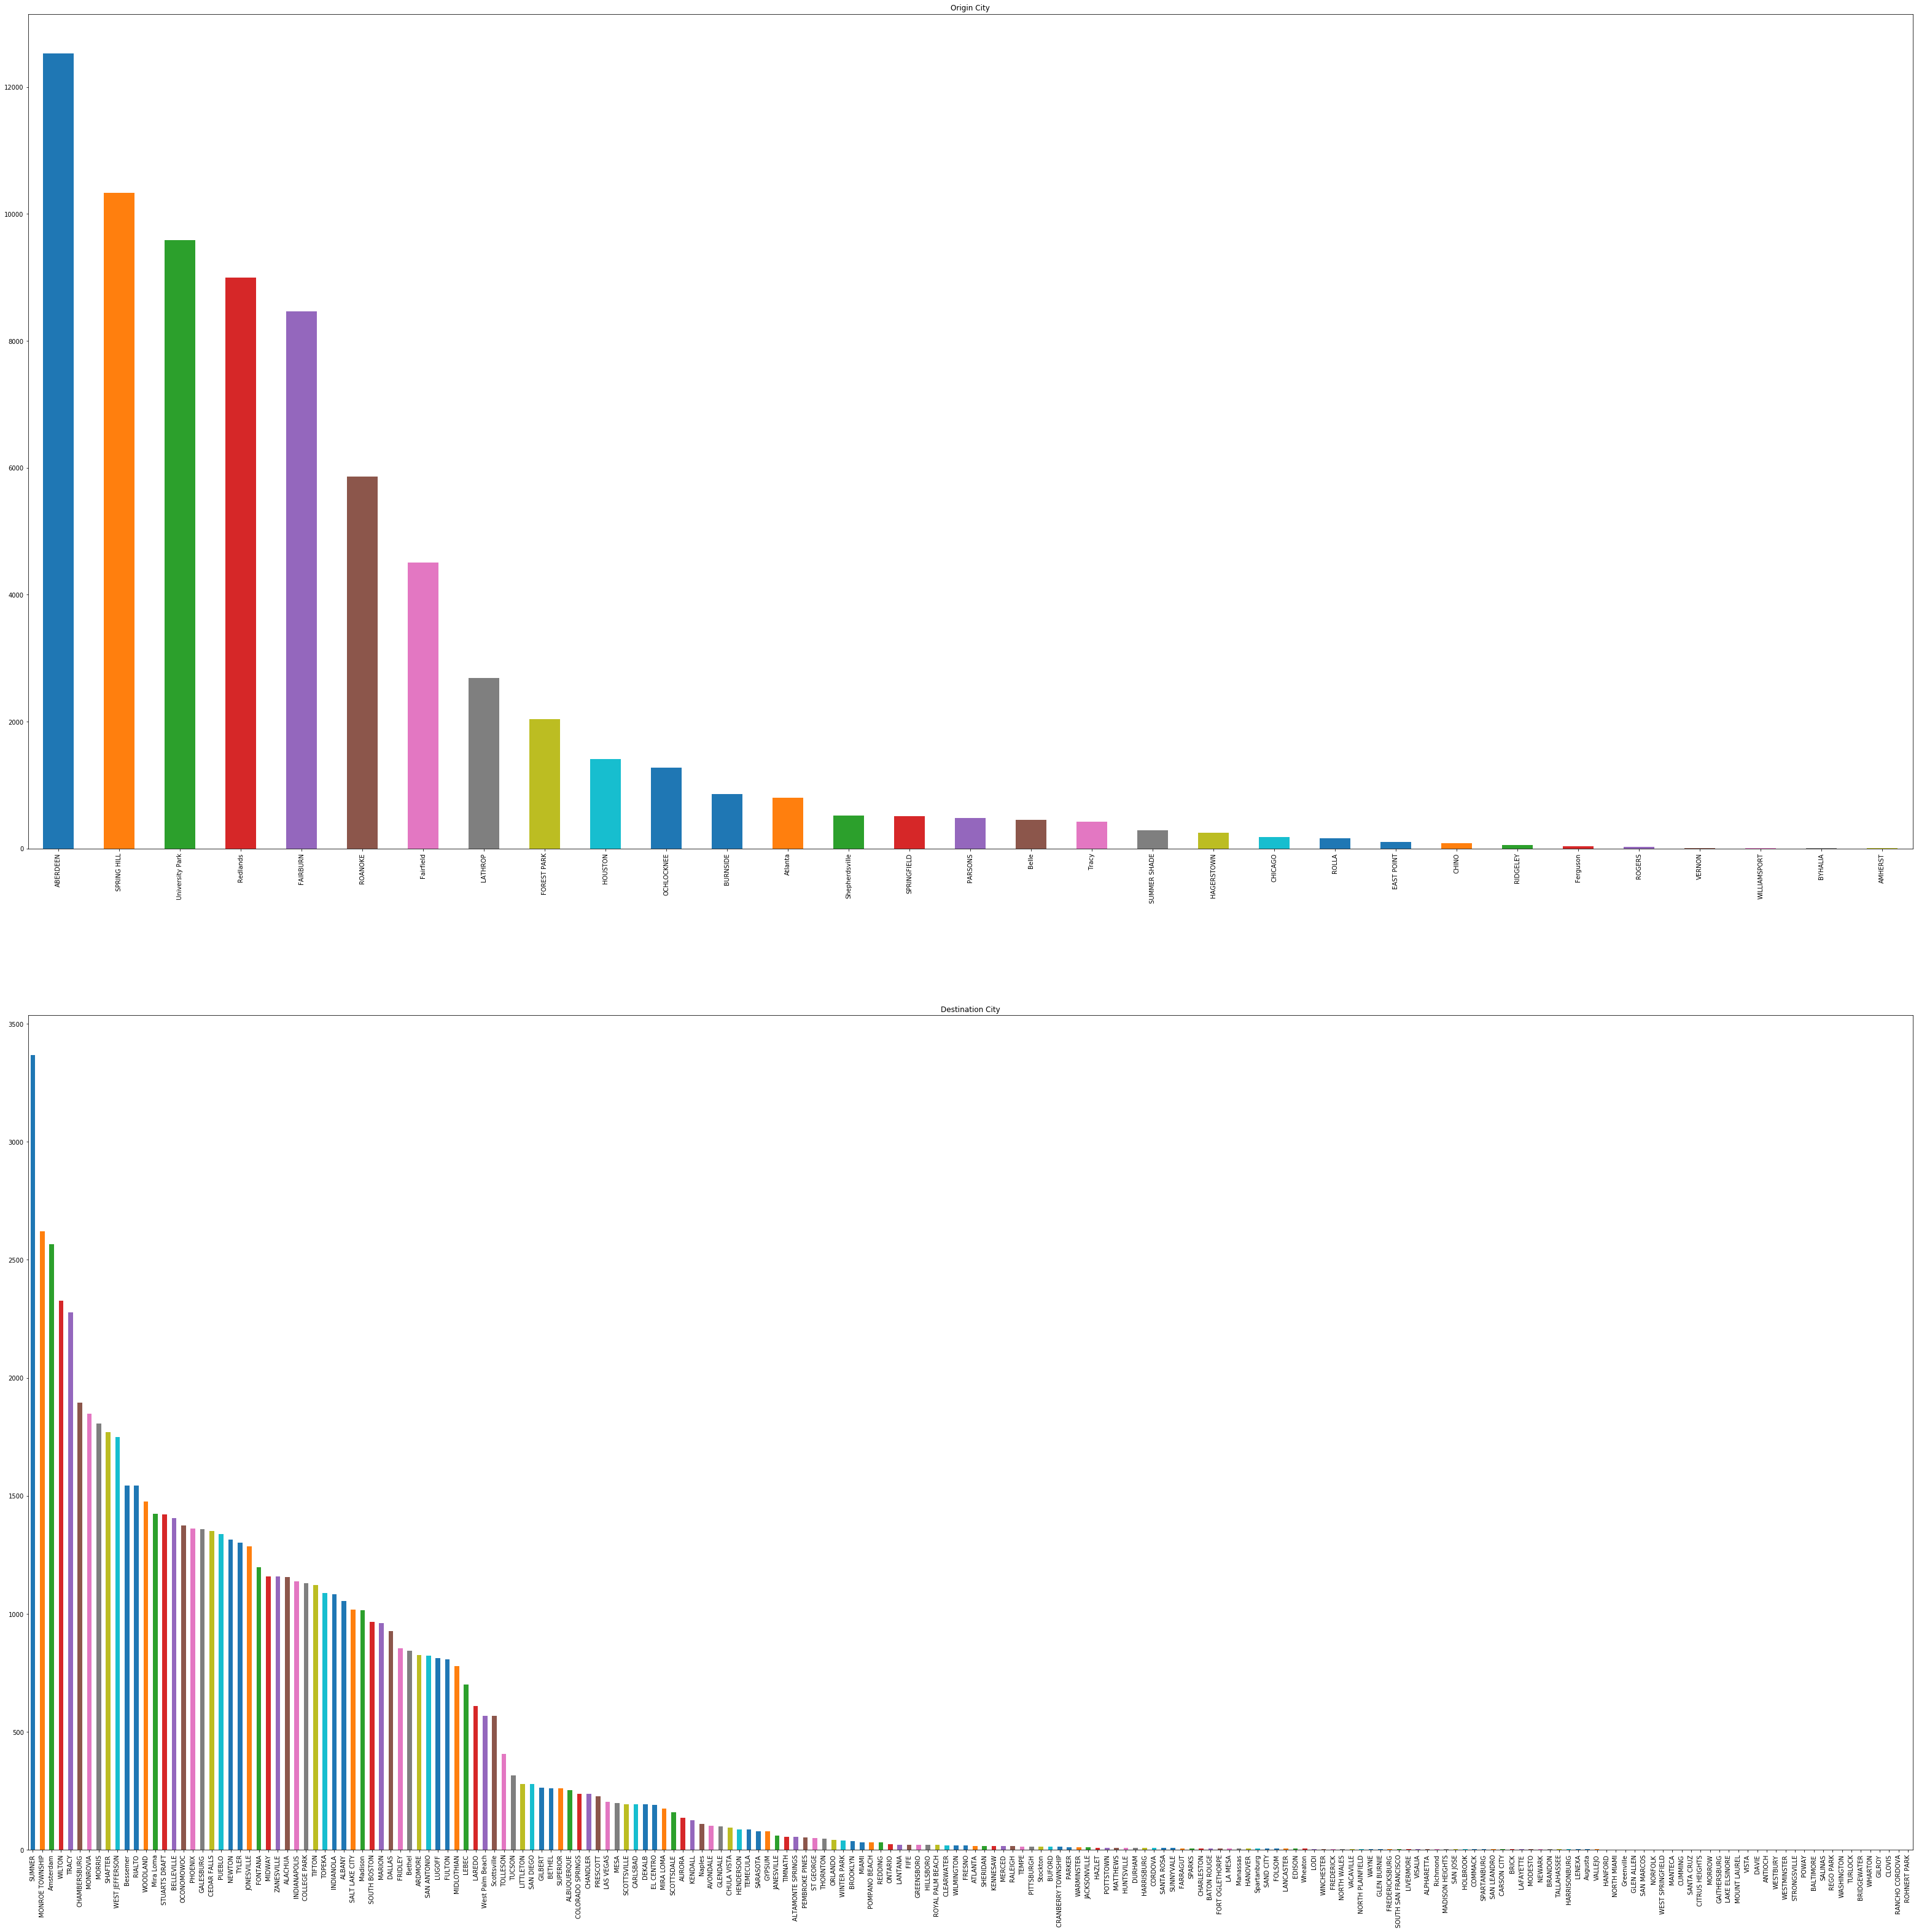

In [122]:
plt.figure(figsize=(55,55))
plt.subplot(2,1,1);data.Origin_City.value_counts().plot(kind='bar');plt.title('Origin City')
plt.subplot(2,1,2);data.Destination_City.value_counts().plot(kind='bar');plt.title('Destination City')


Text(0.5,1,'Destination State')

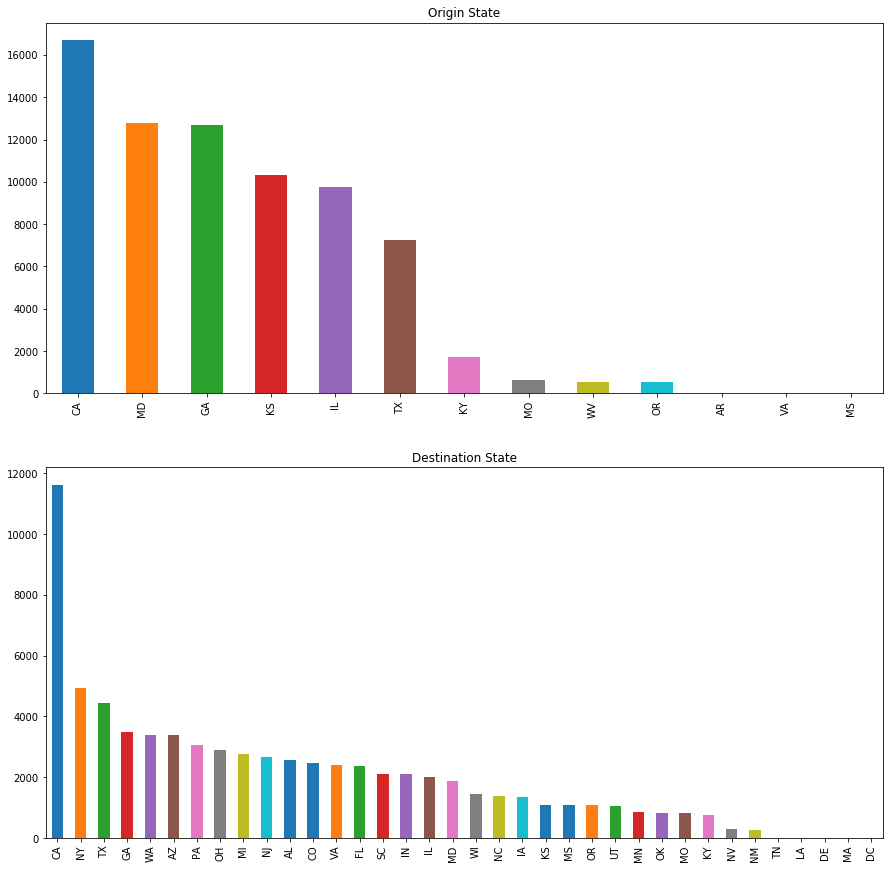

In [123]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1);data.Origin_State.value_counts().plot(kind='bar');plt.title('Origin State')
plt.subplot(2,1,2);data.Destination_State.value_counts().plot(kind='bar');plt.title('Destination State')

In [124]:
data.query("Destination_City=='SUMNER'").Destination_State.head()

36    WA
37    WA
38    WA
39    WA
40    WA
Name: Destination_State, dtype: object

In [125]:
data.dtypes

Req_Delv_Dt                           datetime64[ns]
Cust_Hier1                                    object
Shipt_Orig_Appt_Date                  datetime64[ns]
Shipt_Orig_Appt_Time                          object
Shipt_Origin_Appt_Date_Orig_          datetime64[ns]
Shipt_Origin_Appt_Time_Orig                   object
Shipment_Origin_Appt_Reason                   object
Shipt_Dest_Appt_Date                  datetime64[ns]
Shipt_Dest_Appt_Time                          object
Shipt_Dest_Appt_Date_Orig             datetime64[ns]
Shipt_Dest_Appt_Time_Orig                     object
Shipment_Destination_Appt_Reason              object
Shipt_Planned_Departure_Date          datetime64[ns]
Shipt_Planned_Departure_Time                  object
Shipt_Planned_Arrival_Date            datetime64[ns]
Shipt_Planned_Arrival_Time                    object
Shipt_Arrive_at_Origin_Date           datetime64[ns]
Shipt_Arrive_at_Origin_Time                   object
Shipment_Arrive_Origin_Reason                 

In [ ]:
data['Shipt_Orig_Appt_Time'].head()


In [ ]:
data[data.columns].head()

In [ ]:
data[['Req_Delv_Dt','Cust_Hier1','Shipt_Origin_Appt_Date_Orig_']].head(6)

In [127]:
data.head()

,Req_Delv_Dt,Cust_Hier1,Shipt_Orig_Appt_Date,Shipt_Orig_Appt_Time,Shipt_Origin_Appt_Date_Orig_,Shipt_Origin_Appt_Time_Orig,Shipment_Origin_Appt_Reason,Shipt_Dest_Appt_Date,Shipt_Dest_Appt_Time,Shipt_Dest_Appt_Date_Orig,...,%_Expired,1st_Tender_Accepted,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),Carrier_Type,Shipt_Orig_Appt_Weekday,Shipt_Origin_Appt_Time_OrigX,new_time,Shipt_Origin_Appt_POD,Req_Delv_Dt_Weekday
0,2017-03-24,C001,2017-03-23,10:00:00,2017-03-23,10:00:00,NA-Normal Appointment,2017-03-24,10:00:00,2017-03-24,...,0.0,Yes,1,3.950000,Primary,Thursday,1900-01-01 10:00:00,10.0,Morning,Friday
1,2017-03-22,T002,NaT,NaT,NaT,NaT,NaN,2017-03-22,14:00:00,2017-03-22,...,0.0,Yes,1,20.816667,Primary,NaN,NaT,NaN,NaN,Wednesday
2,2017-03-26,T002,2017-03-24,11:00:00,2017-03-24,11:00:00,NA-Normal Appointment,2017-03-26,23:30:00,2017-03-26,...,0.0,Yes,1,38.766667,Primary,Friday,1900-01-01 11:00:00,11.0,Morning,Sunday
3,2017-03-22,C001,2017-03-20,11:00:00,2017-03-20,11:00:00,NA-Normal Appointment,2017-03-22,05:00:00,2017-03-22,...,0.0,No,0,9.216667,Secondary,Monday,1900-01-01 11:00:00,11.0,Morning,Wednesday
4,2017-03-22,C001,2017-03-20,11:00:00,2017-03-20,11:00:00,NA-Normal Appointment,2017-03-22,05:00:00,2017-03-22,...,0.0,No,0,9.216667,Secondary,Monday,1900-01-01 11:00:00,11.0,Morning,Wednesday


In [130]:
data.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72904 entries, 0 to 72906
Data columns (total 72 columns):
Req_Delv_Dt                           72890 non-null datetime64[ns]
Cust_Hier1                            72904 non-null object
Shipt_Orig_Appt_Date                  58199 non-null datetime64[ns]
Shipt_Orig_Appt_Time                  58199 non-null object
Shipt_Origin_Appt_Date_Orig_          58199 non-null datetime64[ns]
Shipt_Origin_Appt_Time_Orig           58199 non-null object
Shipment_Origin_Appt_Reason           58149 non-null object
Shipt_Dest_Appt_Date                  72797 non-null datetime64[ns]
Shipt_Dest_Appt_Time                  72797 non-null object
Shipt_Dest_Appt_Date_Orig             72561 non-null datetime64[ns]
Shipt_Dest_Appt_Time_Orig             72561 non-null object
Shipment_Destination_Appt_Reason      71979 non-null object
Shipt_Planned_Departure_Date          72904 non-null datetime64[ns]
Shipt_Planned_Departure_Time          72904 non-null object
Shi

In [131]:
data.isnull().sum()* 100 / len(data)

Req_Delv_Dt                            0.019203
Cust_Hier1                             0.000000
Shipt_Orig_Appt_Date                  20.170361
Shipt_Orig_Appt_Time                  20.170361
Shipt_Origin_Appt_Date_Orig_          20.170361
Shipt_Origin_Appt_Time_Orig           20.170361
Shipment_Origin_Appt_Reason           20.238944
Shipt_Dest_Appt_Date                   0.146768
Shipt_Dest_Appt_Time                   0.146768
Shipt_Dest_Appt_Date_Orig              0.470482
Shipt_Dest_Appt_Time_Orig              0.470482
Shipment_Destination_Appt_Reason       1.268792
Shipt_Planned_Departure_Date           0.000000
Shipt_Planned_Departure_Time           0.000000
Shipt_Planned_Arrival_Date             0.000000
Shipt_Planned_Arrival_Time             0.000000
Shipt_Arrive_at_Origin_Date            0.238670
Shipt_Arrive_at_Origin_Time            0.238670
Shipment_Arrive_Origin_Reason          0.432075
Shipt_Depart_Origin_Date               0.004115
Shipt_Depart_Origin_Time               0

In [132]:
data.describe()

,Shipment_Weight_(lb),Shipment_Volume_(cubic_ft),Shipment_Loaded_Miles,Order_#,Stop_Number,ORG_ZIP_FN,DEST_ZP_FN,Origin_Zip,SID,Loads_/_Lane,...,%_Withdrawn,Declined,%_Declined,Rejected,%_Rejected,Expired,%_Expired,%_1st_Tender_Accepted,Average_Carrier_Response_(Min),new_time
count,72904.000000,72904.000000,72904.000000,7.290400e+04,72904.000000,72904.000000,72904.000000,72904.000000,7.290400e+04,72904.000000,...,72904.000000,72904.000000,72904.000000,72904.000000,72904.000000,72904.000000,72904.000000,72904.000000,72904.000000,58199.000000
mean,41847.905604,1906.496680,418.396755,2.063400e+07,2.055964,57887.640418,55448.125864,57887.640418,4.460002e+14,10.346744,...,0.063310,0.178207,0.156631,0.002496,0.001644,0.077431,0.064403,0.708411,59.300443,16.432825
std,6769.304456,707.905414,395.608979,1.227457e+07,0.280344,27023.978764,29897.953918,27023.978764,3.055738e+06,13.895028,...,0.237839,0.437541,0.358908,0.057799,0.037468,0.298823,0.238913,0.454497,219.576491,5.750289
min,2821.120000,180.520000,2.000000,4.647809e+06,2.000000,21001.000000,1089.000000,21001.000000,4.460002e+14,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.183333,0.000000
25%,43286.570000,1336.957500,156.000000,4.871517e+06,2.000000,30213.000000,29353.000000,30213.000000,4.460002e+14,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.616667,12.000000
50%,44205.000000,1971.720000,307.000000,3.005804e+07,2.000000,60484.000000,49053.000000,60484.000000,4.460002e+14,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.783333,18.000000
75%,44730.982000,2501.810000,570.000000,3.020610e+07,2.000000,77020.000000,85224.000000,77020.000000,4.460002e+14,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,37.175000,23.000000
max,46527.520000,3603.360000,2723.000000,3.034522e+07,5.000000,97477.000000,98424.000000,97477.000000,4.460002e+14,188.000000,...,1.000000,7.000000,1.000000,5.000000,1.000000,6.000000,1.000000,1.000000,3819.333333,23.000000
